## Import packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import time

## Data crawlers for freakshow text

In [9]:
# Load the CSV file containing URLs
data = pd.read_csv('data/freakshow/freakshow_2022_2023.csv', ) 
urls = data['url'].tolist() 

# Function to fetch the main text content from a webpage
def fetch_text_from_url(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"
    }
    try:
        # Send a GET request with redirects disabled
        response = requests.get(url, headers=headers, timeout=10, allow_redirects=False)
        
        # Manually handle redirection if needed
        if response.is_redirect or response.status_code == 302:
            redirect_url = response.headers.get('Location')
            if redirect_url:
                # Re-issue request to the redirected URL with the specified encoding
                response = requests.get(redirect_url, headers=headers, timeout=10)
        
        response.raise_for_status()  # Check if the request was successful
        
        # Attempt to decode response text; fallback to 'ISO-8859-1' if UTF-8 fails
        try:
            page_content = response.text
        except UnicodeDecodeError:
            page_content = response.content.decode('ISO-8859-1')
        
        soup = BeautifulSoup(page_content, 'html.parser')
        
        # Extract content within <p> tags
        paragraphs = soup.find_all('p')
        text_content = "\n".join([p.get_text() for p in paragraphs if p.get_text()])
        
        return text_content
    except requests.exceptions.HTTPError as http_err:
        print(f"Cannot fetch {url}, HTTP error: {http_err}")
    except requests.exceptions.Timeout:
        print(f"Cannot fetch {url}, connection timed out.")
    except requests.exceptions.RequestException as e:
        print(f"Cannot fetch {url}, error: {e}")
    return None

# Scrape text content for each URL and display progress
all_texts = []
for url in tqdm(urls, desc="Scraping Progress", leave=True):  # `leave=True` keeps progress bar on one line
    text = fetch_text_from_url(url)
    if text:
        print(f"Successfully fetched: {url}")  # Print success message for each URL fetched
        all_texts.append(text)
    else:
        all_texts.append("")  # Add an empty string if fetching fails
    time.sleep(1)  # Add delay to avoid being blocked

# Add the fetched content to the DataFrame and save to a new CSV file
data['text'] = all_texts
data.to_csv('data/freakshow/freakshow_with_texts.csv', index=False)
print("Scraping completed, file saved as freakshow_with_texts.csv")

Scraping Progress:   0%|          | 0/500 [00:00<?, ?it/s]

Successfully fetched: https://www.spiegel.de/psychologie/leben-mit-krieg-und-corona-viel-glueck-beim-leben-mit-dem-virus-a-015d2cc2-2f74-478f-b41e-a4f43fcca0b9


Scraping Progress:   0%|          | 1/500 [00:02<17:50,  2.15s/it]

Successfully fetched: https://boingboing.net/2023/09/12/documentary-about-schlitzie-coming-out-soon.html


Scraping Progress:   0%|          | 2/500 [00:03<12:28,  1.50s/it]

Cannot fetch https://www.zeit.de/zustimmung?url=https%3A%2F%2Fwww.zeit.de%2Fnews%2F2023-03%2F31%2Finspiriert-von-lindemann-comedian-freakshow-in-berlin, HTTP error: 410 Client Error:  for url: https://www.zeit.de/zustimmung?url=https%3A%2F%2Fwww.zeit.de%2Fnews%2F2023-03%2F31%2Finspiriert-von-lindemann-comedian-freakshow-in-berlin


Scraping Progress:   1%|          | 3/500 [00:04<13:17,  1.61s/it]

Successfully fetched: https://www.slashfilm.com/1295674/ken-russell-tommy-knew-exactly-how-to-utilize-talents-tina-turner/


Scraping Progress:   1%|          | 4/500 [00:05<11:24,  1.38s/it]

Successfully fetched: https://www.sueddeutsche.de/meinung/usa-kevin-mccarthy-repraesentantenhaus-1.5728078


Scraping Progress:   1%|          | 5/500 [00:07<11:08,  1.35s/it]

Successfully fetched: https://www.buzzfeednews.com/article/scaachikoul/love-is-blind-season-2-review


Scraping Progress:   1%|          | 6/500 [00:08<10:14,  1.24s/it]

Successfully fetched: https://www.slashfilm.com/778541/how-memento-mirrors-the-mind-of-christopher-nolan/


Scraping Progress:   1%|▏         | 7/500 [00:09<09:48,  1.19s/it]

Successfully fetched: https://www.heise.de/meinung/Kommentar-Wie-LinkedIn-das-neue-Facebook-und-dann-cool-wurde-9335806.html?wt_mc=rss.red.ho.ho.atom.beitrag.beitrag


Scraping Progress:   2%|▏         | 8/500 [00:10<10:38,  1.30s/it]

Successfully fetched: https://www.abc.es/opinion/diego-s-garrocho-freakshow-20230206025901-nt.html


Scraping Progress:   2%|▏         | 9/500 [00:12<12:31,  1.53s/it]

Successfully fetched: https://biztoc.com/x/f72b97a9eadfbd83


Scraping Progress:   2%|▏         | 10/500 [00:14<13:02,  1.60s/it]

Successfully fetched: https://biztoc.com/x/0c6a5dc4ada89549


Scraping Progress:   2%|▏         | 11/500 [00:16<13:33,  1.66s/it]

Successfully fetched: https://www.nrc.nl/nieuws/2022/02/16/een-grote-freakshow-dankzij-dat-woord-a4090447


Scraping Progress:   2%|▏         | 12/500 [00:17<13:00,  1.60s/it]

Successfully fetched: https://www.journaldugeek.com/critique/critique-nightmare-alley-guillermo-del-toro-fait-son-cirque-🎪/


Scraping Progress:   3%|▎         | 13/500 [00:19<13:57,  1.72s/it]

Successfully fetched: https://www.pcworld.com/article/1441598/lets-build-the-worlds-slowest-desktop-pc.html


Scraping Progress:   3%|▎         | 14/500 [00:21<13:36,  1.68s/it]

Successfully fetched: https://www.stern.de/gesellschaft/regional/berlin-brandenburg/musik--inspiriert-von-lindemann---comedian-freakshow--in-berlin-33338314.html


Scraping Progress:   3%|▎         | 15/500 [00:23<14:18,  1.77s/it]

Successfully fetched: https://www.mmamania.com/2022/9/14/23353780/floyd-mayweathers-bodyguard-jizzy-booked-in-ultimate-freak-show-fight-vs-kouzi-at-super-rizin-mma


Scraping Progress:   3%|▎         | 16/500 [00:25<14:41,  1.82s/it]

Successfully fetched: https://crooksandliars.com/2023/06/mikes-blog-round-1


Scraping Progress:   3%|▎         | 17/500 [00:26<13:35,  1.69s/it]

Successfully fetched: https://indianexpress.com/article/sports/ipl/virat-kohli-is-not-a-power-hitter-but-his-timing-is-just-incredible-harshal-patel-8617421/


Scraping Progress:   4%|▎         | 18/500 [00:29<15:19,  1.91s/it]

Successfully fetched: https://www.mmamania.com/2022/11/6/23443497/highlights-fight-circus-iv-ends-with-two-vs-one-fight-bob-sapp-showdown


Scraping Progress:   4%|▍         | 19/500 [00:31<15:04,  1.88s/it]

Successfully fetched: https://www.blogto.com/radar/2023/01/things-to-do-toronto-this-week-january-9-2023/


Scraping Progress:   4%|▍         | 20/500 [00:32<13:29,  1.69s/it]

Successfully fetched: https://www.mmamania.com/2023/2/17/23604896/video-130-pound-fighter-submits-massive-heavyweight-with-armbar-dogfight-wild-tournament-mma-spain


Scraping Progress:   4%|▍         | 21/500 [00:34<13:39,  1.71s/it]

Successfully fetched: https://www.metalsucks.net/2022/07/12/watch-the-world-championship-of-heavy-metal-knitting-was-a-real-fin-freakshow/


Scraping Progress:   4%|▍         | 22/500 [00:35<13:51,  1.74s/it]

Successfully fetched: https://www.blogto.com/radar/2023/01/things-do-toronto-weekend-january-11-2023/


Scraping Progress:   5%|▍         | 23/500 [00:37<12:46,  1.61s/it]

Cannot fetch https://www.geenstijl.nl/cookie-consent/?target_url=%2F5167955%2Fhet-circus-arriveert%2F%253F&referrer=https%3A%2F%2Ft.co%2F82f90b44c7, error: Invalid URL '/cookie-consent?target_url=%2F5167955%2Fhet-circus-arriveert%2F%253F&referrer=https%3A%2F%2Ft.co%2F82f90b44c7': No scheme supplied. Perhaps you meant https:///cookie-consent?target_url=%2F5167955%2Fhet-circus-arriveert%2F%253F&referrer=https%3A%2F%2Ft.co%2F82f90b44c7?


Scraping Progress:   5%|▍         | 24/500 [00:38<11:45,  1.48s/it]

Successfully fetched: https://bedroomproducersblog.com/2022/10/17/freakshow-industries-pocket-dimension/


Scraping Progress:   5%|▌         | 25/500 [00:39<10:45,  1.36s/it]

Successfully fetched: https://www.metafilter.com/195021/Being-in-a-Constant-Conversation-with-Every-Aspect-of-my-Environment


Scraping Progress:   5%|▌         | 26/500 [00:40<10:30,  1.33s/it]

Successfully fetched: https://bleedingcool.com/tv/watchmen-ahs-stranger-things-more-david-bowie-covers-rocked-tv/


Scraping Progress:   5%|▌         | 27/500 [00:41<09:48,  1.24s/it]

Successfully fetched: https://www.nrc.nl/nieuws/2023/08/22/drank-drugs-en-telefonische-oplichting-a4172489


Scraping Progress:   6%|▌         | 28/500 [00:43<10:34,  1.34s/it]

Successfully fetched: https://www.lavanguardia.com/andro4all/tecnologia/zuckerberg-dice-que-finalmente-no-habra-pelea-con-elon-musk-y-le-echa-la-culpa-a-el


Scraping Progress:   6%|▌         | 29/500 [00:44<09:52,  1.26s/it]

Successfully fetched: https://www.svd.se/a/Ll9yXV/michael-thalheimer-gor-korsbarstradgarden-till-snudd-pa-freakshow


Scraping Progress:   6%|▌         | 30/500 [00:46<10:57,  1.40s/it]

Successfully fetched: https://consequence.net/2022/03/goldman-sachs-ceo-dj-lollapalooza/


Scraping Progress:   6%|▌         | 31/500 [00:47<11:54,  1.52s/it]

Successfully fetched: https://www.theregister.com/2022/02/18/something_for_the_weekend/


Scraping Progress:   6%|▋         | 32/500 [00:49<10:53,  1.40s/it]

Successfully fetched: https://taz.de/Dieter-Bohlen-und-DSDS/!5864347/


Scraping Progress:   7%|▋         | 33/500 [00:50<11:48,  1.52s/it]

Cannot fetch https://www.bloodyelbow.com/2022/5/30/23146827/mma-squared-if-we-cant-have-mma-then-at-least-we-can-have-freakshow-mma-ksw-ufc-mma-news, HTTP error: 404 Client Error: Not Found for url: https://bloodyelbow.com/2022/5/30/23146827/mma-squared-if-we-cant-have-mma-then-at-least-we-can-have-freakshow-mma-ksw-ufc-mma-news


Scraping Progress:   7%|▋         | 34/500 [00:52<11:04,  1.43s/it]

Successfully fetched: https://www.focus.de/panorama/welt/das-dorf-der-haesslichkeit-in-einem-kleinen-dorf-in-italien-tagt-der-club-der-haesslichen_id_191061295.html


Scraping Progress:   7%|▋         | 35/500 [00:55<15:09,  1.96s/it]

Successfully fetched: https://www.rtlboulevard.nl/entertainment/video/5324513/nieuwe-mannelijke-schoonheidsidealen


Scraping Progress:   7%|▋         | 36/500 [00:57<15:58,  2.07s/it]

Successfully fetched: https://www.dn.se/kultur/robert-de-niro-en-besatt-aktor-med-ett-vinnande-varggrin/


Scraping Progress:   7%|▋         | 37/500 [00:59<15:57,  2.07s/it]

Successfully fetched: https://www.memeorandum.com/230604/p43


Scraping Progress:   8%|▊         | 38/500 [01:01<15:33,  2.02s/it]

Successfully fetched: https://justcreative.com/best-circus-fonts/


Scraping Progress:   8%|▊         | 39/500 [01:03<14:16,  1.86s/it]

Successfully fetched: https://politiken.dk/kultur/film_og_tv/art8528127/Bradley-Cooper-har-sex-med-snart-sagt-alle-kvinderne-i-oscarvinders-stjernesp%C3%A6kkede-freakshow


Scraping Progress:   8%|▊         | 40/500 [01:05<14:43,  1.92s/it]

Successfully fetched: https://taz.de/Die-Ochsenknechts-sind-da/!5833732/


Scraping Progress:   8%|▊         | 41/500 [01:06<13:56,  1.82s/it]

Successfully fetched: https://www.laut.de/News/Metalsplitter-Die-Freakshow-von-Till-Lindemann-08-03-2023-19490


Scraping Progress:   8%|▊         | 42/500 [01:08<12:58,  1.70s/it]

Successfully fetched: https://www.freitag.de/autoren/der-freitag/freakshow-schwanensee-wie-kann-sich-der-kanon-der-tanzwelt-aendern


Scraping Progress:   9%|▊         | 43/500 [01:09<12:43,  1.67s/it]

Successfully fetched: https://www.lewrockwell.com/2022/05/jim-quinn/american-freakshow/


Scraping Progress:   9%|▉         | 44/500 [01:11<13:00,  1.71s/it]

Successfully fetched: https://fishki.net/4501026-50-interesnejshih-jeksponatov-muzeja-dikovinok.html


Scraping Progress:   9%|▉         | 45/500 [01:14<16:32,  2.18s/it]

Cannot fetch https://www.geenstijl.nl/cookie-consent/?target_url=%2F5167119%2Fmobilisatie-dag-10-grassroots-menigte-uitzinnig-om-poetins-speech-priester-eist-heilige-oorlog%2F%253F&referrer=https%3A%2F%2Ft.co%2F9ac6974fd4, error: Invalid URL '/cookie-consent?target_url=%2F5167119%2Fmobilisatie-dag-10-grassroots-menigte-uitzinnig-om-poetins-speech-priester-eist-heilige-oorlog%2F%253F&referrer=https%3A%2F%2Ft.co%2F9ac6974fd4': No scheme supplied. Perhaps you meant https:///cookie-consent?target_url=%2F5167119%2Fmobilisatie-dag-10-grassroots-menigte-uitzinnig-om-poetins-speech-priester-eist-heilige-oorlog%2F%253F&referrer=https%3A%2F%2Ft.co%2F9ac6974fd4?


Scraping Progress:   9%|▉         | 46/500 [01:15<14:08,  1.87s/it]

Cannot fetch https://www.parool.nl/columns-opinie/opinie-freakshow-body-worlds-moet-uit-amsterdam-worden-geweerd~b0de4265/, HTTP error: 403 Client Error: Forbidden for url: https://www.parool.nl/columns-opinie/opinie-freakshow-body-worlds-moet-uit-amsterdam-worden-geweerd~b0de4265/


Scraping Progress:   9%|▉         | 47/500 [01:16<12:11,  1.61s/it]

Successfully fetched: https://www.queerty.com/queertys-essential-spooky-queer-pop-playlist-halloween-party-needs-20221022


Scraping Progress:  10%|▉         | 48/500 [01:20<15:55,  2.11s/it]

Successfully fetched: https://bleedingcool.com/games/super-buff-hd-is-coming-to-pc-consoles-in-2023/


Scraping Progress:  10%|▉         | 49/500 [01:21<13:28,  1.79s/it]

Successfully fetched: https://screenrant.com/the-batman-penguin-danny-devito-response-polygraph-video/


Scraping Progress:  10%|█         | 50/500 [01:22<12:43,  1.70s/it]

Successfully fetched: https://bleedingcool.com/games/super-buff-hd-receives-new-buff-trailer-buff-release-date/


Scraping Progress:  10%|█         | 51/500 [01:23<11:13,  1.50s/it]

Successfully fetched: https://www.mmamania.com/2022/10/13/23403096/mma-world-in-shock-after-hasbulla-announces-contract-fight-ufc


Scraping Progress:  10%|█         | 52/500 [01:25<11:37,  1.56s/it]

Successfully fetched: https://www.morgenpost.de/berlin/article238046707/Inspiriert-von-Lindemann-Comedian-Freakshow-in-Berlin.html


Scraping Progress:  11%|█         | 53/500 [01:26<10:58,  1.47s/it]

Successfully fetched: https://www.morgenpost.de/vermischtes/article237642983/rammstein-till-lindemann-freakshow-zirkus-tickets-vorverkauf.html


Scraping Progress:  11%|█         | 54/500 [01:27<10:24,  1.40s/it]

Successfully fetched: https://taz.de/Der-Hausbesuch/!5913230/


Scraping Progress:  11%|█         | 55/500 [01:29<11:06,  1.50s/it]

Successfully fetched: https://deadline.com/2022/05/johnny-depp-trial-ugly-amber-heard-cross-examination-1235024168/


Scraping Progress:  11%|█         | 56/500 [01:31<11:36,  1.57s/it]

Successfully fetched: https://www.joblo.com/charles-band-full-moon-freakshow-podcast/


Scraping Progress:  11%|█▏        | 57/500 [01:33<11:39,  1.58s/it]

Cannot fetch https://finance.yahoo.com/news/michael-david-winery-announces-retirement-100000723.html, HTTP error: 404 Client Error: Not Found for url: https://finance.yahoo.com/news/michael-david-winery-announces-retirement-100000723.html


Scraping Progress:  12%|█▏        | 58/500 [01:34<10:40,  1.45s/it]

Cannot fetch https://www.bloodyelbow.com/2023/2/19/23606092/video-5-foot-4-flyweight-vs-6-foot-6-heavyweight-who-wins, HTTP error: 404 Client Error: Not Found for url: https://bloodyelbow.com/2023/2/19/23606092/video-5-foot-4-flyweight-vs-6-foot-6-heavyweight-who-wins


Scraping Progress:  12%|█▏        | 59/500 [01:35<10:06,  1.37s/it]

Successfully fetched: https://www.metalsucks.net/2022/07/27/exclusive-video-premiere-belushi-speed-ball-ex-gwar-rip-spongebob-a-new-one-with-magic-conch/


Scraping Progress:  12%|█▏        | 60/500 [01:37<10:39,  1.45s/it]

Successfully fetched: https://decider.com/2023/06/07/cannes-film-festival-2023-final-report/


Scraping Progress:  12%|█▏        | 61/500 [01:38<09:47,  1.34s/it]

Successfully fetched: https://www.mmamania.com/2023/5/26/23738552/conor-mcgregor-responds-to-ginger-sausage-canelo-alvarez-id-beat-you-with-no-hands


Scraping Progress:  12%|█▏        | 62/500 [01:39<10:59,  1.51s/it]

Successfully fetched: http://www.thehollywoodgossip.com/2022/09/elizabeth-potthasts-sister-jenn-in-trouble-with-ex-husband-for-daughters-roles-on-show/


Scraping Progress:  13%|█▎        | 63/500 [01:42<12:12,  1.68s/it]

Cannot fetch https://www.geenstijl.nl/5170878/dead-men-walking/, error: Invalid URL '/5170878/dead-men-walking': No scheme supplied. Perhaps you meant https:///5170878/dead-men-walking?


Scraping Progress:  13%|█▎        | 64/500 [01:43<11:00,  1.51s/it]

Cannot fetch https://www.geenstijl.nl/cookie-consent/?target_url=%2F5167679%2Fmidterms-huis-waarschijnlijk-naar-republikeinen-senaat-gaat-nek-aan-nek%2F%253F&referrer=https%3A%2F%2Ft.co%2F302842d578, error: Invalid URL '/cookie-consent?target_url=%2F5167679%2Fmidterms-huis-waarschijnlijk-naar-republikeinen-senaat-gaat-nek-aan-nek%2F%253F&referrer=https%3A%2F%2Ft.co%2F302842d578': No scheme supplied. Perhaps you meant https:///cookie-consent?target_url=%2F5167679%2Fmidterms-huis-waarschijnlijk-naar-republikeinen-senaat-gaat-nek-aan-nek%2F%253F&referrer=https%3A%2F%2Ft.co%2F302842d578?


Scraping Progress:  13%|█▎        | 65/500 [01:44<10:10,  1.40s/it]

Successfully fetched: https://www.newsshooter.com/2023/06/28/mutiny-12g-isolator/


Scraping Progress:  13%|█▎        | 66/500 [01:45<10:30,  1.45s/it]

Successfully fetched: https://coltswire.usatoday.com/lists/indianapolis-colts-adetomiwa-adebawore-nfl-draft-pick-twitter-reactions/


Scraping Progress:  13%|█▎        | 67/500 [01:47<10:52,  1.51s/it]

Successfully fetched: https://touchdownwire.usatoday.com/2023/02/26/2023-nfl-draft-scouting-combine-tyree-wilson-jalin-hyatt/


Scraping Progress:  14%|█▎        | 68/500 [01:49<11:06,  1.54s/it]

Successfully fetched: https://lionswire.usatoday.com/2023/03/04/darnell-washington-nfl-scouting-combine-lions-draft-prospect/


Scraping Progress:  14%|█▍        | 69/500 [01:51<11:44,  1.63s/it]

Cannot fetch https://www.bloodyelbow.com/2022/6/16/23169516/ufc-mma-news-media-instagram-khamzat-chimaev-darren-till-nick-nate-diaz-fight-tag-team, HTTP error: 404 Client Error: Not Found for url: https://bloodyelbow.com/2022/6/16/23169516/ufc-mma-news-media-instagram-khamzat-chimaev-darren-till-nick-nate-diaz-fight-tag-team


Scraping Progress:  14%|█▍        | 70/500 [01:52<10:52,  1.52s/it]

Successfully fetched: https://www.mmamania.com/2023/8/8/23825259/demetrious-johnson-plans-grappling-match-vs-260-pound-meathead-podcaster-bradley-martyn


Scraping Progress:  14%|█▍        | 71/500 [01:53<10:21,  1.45s/it]

Successfully fetched: https://chargerswire.usatoday.com/2023/07/24/chargers-cbs-sports-all-rookie-team-quentin-johnston-daiyan-henley/


Scraping Progress:  14%|█▍        | 72/500 [01:54<10:18,  1.45s/it]

Successfully fetched: https://cdm.link/2022/11/cyber-monday-synth-plugin-deals/


Scraping Progress:  15%|█▍        | 73/500 [01:56<11:24,  1.60s/it]

Successfully fetched: https://screenrant.com/jibri-90-day-fiance-rant-apology-miona-family/


Scraping Progress:  15%|█▍        | 74/500 [01:58<10:34,  1.49s/it]

Successfully fetched: https://bloody-disgusting.com/interviews/3716819/john-carpenter-and-charles-band-talk-halloween-atari-game-career-intersections-and-more-in-new-chat/


Scraping Progress:  15%|█▌        | 75/500 [02:00<12:19,  1.74s/it]

Successfully fetched: https://cdm.link/2023/06/john-cage-meets-sun-ra/


Scraping Progress:  15%|█▌        | 76/500 [02:02<12:43,  1.80s/it]

Successfully fetched: https://www.pcgamer.com/warzone-2-is-getting-absolutely-slated-by-steam-reviewers-crash-of-duty/


Scraping Progress:  15%|█▌        | 77/500 [02:03<11:45,  1.67s/it]

Successfully fetched: https://www.investmentwatchblog.com/its-a-total-financial-freakshow-expect-government-spending-to-skyrocket/


Scraping Progress:  16%|█▌        | 78/500 [02:05<10:46,  1.53s/it]

Successfully fetched: https://www.stern.de/kultur/willkommen-im-circus-rammstein-oder--menschen--pimmel--sensationen--33378064.html


Scraping Progress:  16%|█▌        | 79/500 [02:06<10:40,  1.52s/it]

Cannot fetch https://www.geenstijl.nl/cookie-consent/?target_url=%2F5165180%2Fthey-done-what-s-right-by-them-can-t-expect-more-than-that%2F%253F&referrer=https%3A%2F%2Ft.co%2F20680b497a, error: Invalid URL '/cookie-consent?target_url=%2F5165180%2Fthey-done-what-s-right-by-them-can-t-expect-more-than-that%2F%253F&referrer=https%3A%2F%2Ft.co%2F20680b497a': No scheme supplied. Perhaps you meant https:///cookie-consent?target_url=%2F5165180%2Fthey-done-what-s-right-by-them-can-t-expect-more-than-that%2F%253F&referrer=https%3A%2F%2Ft.co%2F20680b497a?


Scraping Progress:  16%|█▌        | 80/500 [02:07<09:52,  1.41s/it]

Cannot fetch https://www.thedailybeast.com/obsessed/halloween-ends-wins-box-office-but-is-such-a-disappointing-franchise-finale, error: Invalid URL '/obsessed/halloween-ends-wins-box-office-but-is-such-a-disappointing-franchise-finale/': No scheme supplied. Perhaps you meant https:///obsessed/halloween-ends-wins-box-office-but-is-such-a-disappointing-franchise-finale/?


Scraping Progress:  16%|█▌        | 81/500 [02:08<09:13,  1.32s/it]

Successfully fetched: https://www.mmamania.com/2023/1/15/23556784/enson-inoue-shows-off-old-pride-fc-contract-that-specifically-excludes-steroids-from-drug-testing


Scraping Progress:  16%|█▋        | 82/500 [02:10<10:51,  1.56s/it]

Successfully fetched: https://www.mmamania.com/2023/5/12/23721043/pot-to-kettle-jake-paul-says-misfits-boxing-doesnt-respect-the-sport


Scraping Progress:  17%|█▋        | 83/500 [02:12<11:32,  1.66s/it]

Successfully fetched: https://drunkenstepfather.com/2022/02/14/bjorks-daughter-got-them-tits-on


Scraping Progress:  17%|█▋        | 84/500 [02:14<11:27,  1.65s/it]

Cannot fetch https://www.vg.no/nyheter/utenriks/i/GMOad9/seks-galakser-funnet-med-webb-teleskopet, error: Invalid URL '/nyheter/i/GMOad9/seks-galakser-funnet-med-webb-teleskopet': No scheme supplied. Perhaps you meant https:///nyheter/i/GMOad9/seks-galakser-funnet-med-webb-teleskopet?


Scraping Progress:  17%|█▋        | 85/500 [02:15<10:59,  1.59s/it]

Successfully fetched: https://www.mmamania.com/2023/9/25/23888538/video-watch-mateusz-gamrot-hammer-rafael-fizievs-knee-before-fight-ending-injury


Scraping Progress:  17%|█▋        | 86/500 [02:17<11:54,  1.72s/it]

Cannot fetch https://finance.yahoo.com/news/baby-barn-owls-released-michael-093000658.html, HTTP error: 404 Client Error: Not Found for url: https://finance.yahoo.com/news/baby-barn-owls-released-michael-093000658.html


Scraping Progress:  17%|█▋        | 87/500 [02:19<10:42,  1.56s/it]

Successfully fetched: https://www.newsshooter.com/2022/06/07/mutiny-raptor-io-av-module-for-red-v-raptor/


Scraping Progress:  18%|█▊        | 88/500 [02:20<10:44,  1.57s/it]

Successfully fetched: https://bevcooks.com/2023/08/friday-flotsam-380/


Scraping Progress:  18%|█▊        | 89/500 [02:22<11:36,  1.69s/it]

Successfully fetched: https://www.mmamania.com/2023/4/1/23662320/roy-jones-jr-vs-anthony-pettis-results-live-streaming-fight-coverage-ufc-fight-pass-boxing


Scraping Progress:  18%|█▊        | 90/500 [02:24<11:55,  1.75s/it]

Cannot fetch https://www.hln.be/tv/surrealistisch-lichtjes-onnozel-en-onweerstaanbaar-hoe-de-koreaanse-freakshow-the-masked-singer-een-internationaal-succes-werd~a2bea1f9/, HTTP error: 403 Client Error: Forbidden for url: https://www.hln.be/tv/surrealistisch-lichtjes-onnozel-en-onweerstaanbaar-hoe-de-koreaanse-freakshow-the-masked-singer-een-internationaal-succes-werd~a2bea1f9/


Scraping Progress:  18%|█▊        | 91/500 [02:25<10:25,  1.53s/it]

Successfully fetched: https://drunkenstepfather.com/2023/06/13/kim-kardashians-pink-bikini-of-the-day


Scraping Progress:  18%|█▊        | 92/500 [02:27<10:17,  1.51s/it]

Successfully fetched: https://www.mmamania.com/2023/9/11/23867939/conor-mcgregor-wants-a-piece-of-new-champ-sean-strickland-no-mess-id-fancy-it


Scraping Progress:  19%|█▊        | 93/500 [02:28<11:00,  1.62s/it]

Successfully fetched: https://www.metalsucks.net/2022/07/06/machine-gun-kelly-regrets-corey-taylor-feud-the-situations-unfortunate-i-was-a-slipknot-fan/


Scraping Progress:  19%|█▉        | 95/500 [02:31<10:17,  1.52s/it]

Successfully fetched: https://drunkenstepfather.com/2022/05/27/caroline-vreeland-top-heavy-of-the-day


Scraping Progress:  19%|█▉        | 96/500 [02:33<10:25,  1.55s/it]

Successfully fetched: https://screenrant.com/arguments-every-american-horror-story-fan-gets-into/


Scraping Progress:  19%|█▉        | 97/500 [02:34<09:48,  1.46s/it]

Successfully fetched: https://www.odditycentral.com/news/company-specializes-in-harvesting-and-preserving-peoples-tattoos-after-their-death.html


Scraping Progress:  20%|█▉        | 98/500 [02:36<09:32,  1.42s/it]

Cannot fetch https://www.geenstijl.nl/5169290/live-poetins-speech-na-1-jaar-invasie/, error: Invalid URL '/5169290/live-poetins-speech-na-1-jaar-invasie': No scheme supplied. Perhaps you meant https:///5169290/live-poetins-speech-na-1-jaar-invasie?


Scraping Progress:  20%|█▉        | 99/500 [02:37<09:00,  1.35s/it]

Successfully fetched: https://www.dn.se/kultur/helena-lindblad-arets-oscarsgala-var-tidernas-galnaste-filmfest/


Scraping Progress:  20%|██        | 100/500 [02:39<10:10,  1.53s/it]

Successfully fetched: https://www.nakedcapitalism.com/?p=248975


Scraping Progress:  20%|██        | 101/500 [02:42<13:52,  2.09s/it]

Successfully fetched: https://www.mmamania.com/2022/6/12/23164863/ridiculously-jacked-bob-sapp-calls-out-mike-tyson-i-will-rip-your-heart-out


Scraping Progress:  20%|██        | 102/500 [02:44<13:38,  2.06s/it]

Successfully fetched: https://www.nrc.nl/nieuws/2022/02/13/emma-thompson-naakt-het-beste-wat-ik-ooit-deed-a4088498


Scraping Progress:  21%|██        | 103/500 [02:46<12:31,  1.89s/it]

Successfully fetched: https://www.thedailymash.co.uk/news/lifestyle/teenager-decides-to-dramatically-limit-her-options-with-facial-tattoo-20231013241199


Scraping Progress:  21%|██        | 104/500 [02:47<11:19,  1.72s/it]

Successfully fetched: https://www.thedailymash.co.uk/news/arts-entertainment/naked-attraction-shows-that-shouldnt-have-a-middle-aged-parents-version-20231012241181


Scraping Progress:  21%|██        | 105/500 [02:48<10:28,  1.59s/it]

Successfully fetched: https://www.mmamania.com/2022/10/2/23384348/four-division-boxing-champ-adrien-broner-calls-out-nate-diaz-lets-get-it


Scraping Progress:  21%|██        | 106/500 [02:50<11:05,  1.69s/it]

Successfully fetched: https://www.mmamania.com/2022/9/25/23371852/rizin-ff-president-apologizes-after-vile-individual-defiled-sacred-ring-mayweather-fight


Scraping Progress:  21%|██▏       | 107/500 [02:51<10:15,  1.57s/it]

Successfully fetched: https://www.vanityfair.com/hollywood/2022/11/weird-al-movie-review-does-what-it-says-on-the-box-its-pretty-weird


Scraping Progress:  22%|██▏       | 108/500 [02:53<11:00,  1.68s/it]

Successfully fetched: https://www.shtfplan.com/headline-news/gregory-mannarino-the-federal-reserve-is-very-close-to-cbdc-rollout


Scraping Progress:  22%|██▏       | 109/500 [02:55<10:06,  1.55s/it]

Cannot fetch https://www.thedailybeast.com/obsessed/halloween-ends-review-jamie-lee-curtis-deserves-far-better-than-this-lame-horror-franchise-finale, error: Invalid URL '/obsessed/halloween-ends-review-jamie-lee-curtis-deserves-far-better-than-this-lame-horror-franchise-finale/': No scheme supplied. Perhaps you meant https:///obsessed/halloween-ends-review-jamie-lee-curtis-deserves-far-better-than-this-lame-horror-franchise-finale/?


Scraping Progress:  22%|██▏       | 110/500 [02:56<09:22,  1.44s/it]

Successfully fetched: https://www.dn.se/kultur/solkig-cirkusmystik-i-den-guldkantade-skadespelarfesten-nightmare-alley/


Scraping Progress:  22%|██▏       | 111/500 [02:58<10:14,  1.58s/it]

Successfully fetched: https://www.mmamania.com/2023/5/18/23728234/anthony-joshua-turns-down-gimmick-fight-against-francis-ngannou


Scraping Progress:  22%|██▏       | 112/500 [03:00<11:06,  1.72s/it]

Successfully fetched: https://rollingstone.uol.com.br/entretenimento/american-horror-story-interpretar-siamesas-foi-um-pesadelo-diz-sarah-paulson/


Scraping Progress:  23%|██▎       | 113/500 [03:02<11:17,  1.75s/it]

Successfully fetched: https://www.mmamania.com/2022/9/25/23371055/knockout-mayweather-bodyguard-jizzy-gets-whacked-finished-at-super-rizin


Scraping Progress:  23%|██▎       | 114/500 [03:04<11:37,  1.81s/it]

Successfully fetched: https://www.mmamania.com/2022/10/11/23393695/kouzi-aims-to-become-the-money-team-killer-by-taking-out-big-unskilled-americans-one-by-one-rizin


Scraping Progress:  23%|██▎       | 115/500 [03:05<11:47,  1.84s/it]

Successfully fetched: https://www.mmamania.com/2023/6/13/23759103/stephen-a-smith-is-sick-of-watching-floyd-mayweather-fight-punks-they-dont-deserve-it


Scraping Progress:  23%|██▎       | 116/500 [03:07<11:36,  1.81s/it]

Successfully fetched: https://www.mmamania.com/2023/6/22/23769654/report-francis-ngannou-vs-derek-chisora-under-consideration-for-december-in-saudi-arabia


Scraping Progress:  23%|██▎       | 117/500 [03:09<11:19,  1.77s/it]

Successfully fetched: https://es.ign.com/nightmare-alley/179011/review/critica-de-el-callejon-de-las-almas-perdidas-la-brutalidad-del-hombre-es-un-horror-suficiente


Scraping Progress:  24%|██▍       | 119/500 [03:11<09:21,  1.47s/it]

Successfully fetched: https://bleedingcool.com/comics/still-supernatural-in-the-daily-litg-24th-january-2022/


Scraping Progress:  24%|██▍       | 120/500 [03:12<08:30,  1.34s/it]

Cannot fetch https://www.theamericanconservative.com/articles/is-there-life-after-drudge/, error: Invalid URL '/is-there-life-after-drudge/': No scheme supplied. Perhaps you meant https:///is-there-life-after-drudge/?


Scraping Progress:  24%|██▍       | 121/500 [03:13<08:12,  1.30s/it]

Successfully fetched: https://www.nrc.nl/nieuws/2022/11/15/een-louche-leverancier-van-onvervulde-dromen-in-rimini-a4148304


Scraping Progress:  24%|██▍       | 122/500 [03:15<08:44,  1.39s/it]

Successfully fetched: https://www.bloodyelbow.com/2022/5/18/23116186/russian-promotion-neo-nazi-convicted-rapist-datsik-emelianenko-boxing-news


Scraping Progress:  25%|██▍       | 123/500 [03:16<08:24,  1.34s/it]

Successfully fetched: https://www.mmamania.com/2023/3/30/23662915/conor-mcgregor-ready-to-welcome-carl-froch-into-the-cage-get-this-signed-up


Scraping Progress:  25%|██▍       | 124/500 [03:18<09:40,  1.54s/it]

Successfully fetched: https://www.mmamania.com/2023/4/16/23685612/darren-till-calls-out-froch-fury-fielding-and-joyce-for-boxing-bouts-all-can-get-it


Scraping Progress:  25%|██▌       | 125/500 [03:20<10:22,  1.66s/it]

Successfully fetched: https://www.mmamania.com/2023/5/8/23715146/dana-white-power-slap-is-number-1-in-all-of-sports-above-nfl-nba-nhl-f-1-wwe-combined


Scraping Progress:  25%|██▌       | 126/500 [03:22<09:37,  1.54s/it]

Cannot fetch https://www.vg.no/rampelys/film/i/9K07eW/filmanmeldelse-nightmare-alley-svart-som-natten, error: Invalid URL '/rampelys/i/9K07eW/filmanmeldelse-nightmare-alley-svart-som-natten': No scheme supplied. Perhaps you meant https:///rampelys/i/9K07eW/filmanmeldelse-nightmare-alley-svart-som-natten?


Scraping Progress:  25%|██▌       | 127/500 [03:23<09:29,  1.53s/it]

Cannot fetch https://www.vg.no/rampelys/tv/i/y404x2/vant-torpet-flytter-inn-paa-farmen-kjendis-gaarden, error: Invalid URL '/rampelys/i/y404x2/vant-torpet-flytter-inn-paa-farmen-kjendis-gaarden': No scheme supplied. Perhaps you meant https:///rampelys/i/y404x2/vant-torpet-flytter-inn-paa-farmen-kjendis-gaarden?


Scraping Progress:  26%|██▌       | 128/500 [03:24<09:03,  1.46s/it]

Cannot fetch https://www.geenstijl.nl/5172559/longest-war/, error: Invalid URL '/5172559/longest-war': No scheme supplied. Perhaps you meant https:///5172559/longest-war?


Scraping Progress:  26%|██▌       | 129/500 [03:25<08:26,  1.37s/it]

Successfully fetched: https://www.bloodyelbow.com/2022/7/13/23206591/antonio-bigfoot-silva-ufc-ko-russian-neo-nazi-datsik-mma-russia


Scraping Progress:  26%|██▌       | 130/500 [03:27<08:11,  1.33s/it]

Successfully fetched: https://www.bloodyelbow.com/2023/3/20/23648063/rampage-jackson-bob-sapp-musical-chairs-of-death-other-oddities-fight-circus-6-mma-fight-card


Scraping Progress:  26%|██▌       | 131/500 [03:28<07:59,  1.30s/it]

Successfully fetched: https://www.metalsucks.net/2022/02/13/ted-nugent-calls-out-neil-youngs-use-of-mind-altering-chemicals-in-defense-of-podcaster-who-regularly-does-mushrooms-and-dmt/


Scraping Progress:  27%|██▋       | 133/500 [03:32<09:27,  1.55s/it]

Successfully fetched: https://gonintendo.com/contents/9647-skate-surf-fps-super-buff-hd-announced-for-switch


Scraping Progress:  27%|██▋       | 134/500 [03:33<08:46,  1.44s/it]

Successfully fetched: https://www.mmamania.com/2023/10/22/23927506/report-paulo-costa-attacker-from-ufc-294-brawl-identified-as-gun-toting-russian-troublemaker


Scraping Progress:  27%|██▋       | 135/500 [03:36<11:26,  1.88s/it]

Successfully fetched: https://rlsbb.ru/super-buff-hd-tenoke/


Scraping Progress:  27%|██▋       | 136/500 [03:37<10:23,  1.71s/it]

Successfully fetched: https://www.stern.de/lifestyle/royal--prinz-harry--maenner-muessen-mehr-denn-je-ueber-gefuehle-reden-33253392.html


Scraping Progress:  27%|██▋       | 137/500 [03:39<10:42,  1.77s/it]

Successfully fetched: https://www.joblo.com/sugar-colin-farrell/


Scraping Progress:  28%|██▊       | 138/500 [03:41<10:30,  1.74s/it]

Successfully fetched: https://www.faz.net/aktuell/feuilleton/frank-castorf-inszeniert-eine-moliere-collage-in-koeln-17747139.html


Scraping Progress:  28%|██▊       | 139/500 [03:42<09:53,  1.64s/it]

Successfully fetched: https://www.stereogum.com/2202532/turnstile-concert-review/columns/let-the-roundup-begin/


Scraping Progress:  28%|██▊       | 140/500 [03:44<10:43,  1.79s/it]

Successfully fetched: https://brobible.com/culture/article/teletubbies-reboot-trailer-reaction/


Scraping Progress:  28%|██▊       | 141/500 [03:46<09:54,  1.66s/it]

Successfully fetched: https://www.nrc.nl/nieuws/2022/07/05/punks-in-films-en-series-tussen-straattuigcliche-en-rolmodel-a4135614


Scraping Progress:  28%|██▊       | 142/500 [03:47<09:51,  1.65s/it]

Successfully fetched: https://gonintendo.com/contents/26098-new-trailer-shared-for-super-buff-hd


Scraping Progress:  29%|██▊       | 143/500 [03:49<08:59,  1.51s/it]

Successfully fetched: https://survivalblog.com/2022/06/14/survivalblogs-news-american-redoubt-249/


Scraping Progress:  29%|██▉       | 144/500 [03:50<09:04,  1.53s/it]

Successfully fetched: https://www.dw.com/de/esc-lord-of-the-lost/a-65581154


Scraping Progress:  29%|██▉       | 145/500 [03:52<09:37,  1.63s/it]

Successfully fetched: https://drunkenstepfather.com/2022/05/17/morning-hangover-dump-of-the-day-2321


Scraping Progress:  29%|██▉       | 146/500 [03:53<09:23,  1.59s/it]

Successfully fetched: https://www.poynter.org/commentary/2022/the-latest-scenes-and-stories-from-ukraine-are-a-gut-punch/


Scraping Progress:  29%|██▉       | 147/500 [03:56<11:41,  1.99s/it]

Successfully fetched: https://gonintendo.com/contents/26892-get-a-new-look-at-super-buff-hd-with-the-latest-trailer


Scraping Progress:  30%|██▉       | 148/500 [03:58<10:14,  1.75s/it]

Successfully fetched: https://screenrant.com/recasting-pennywise-clown-it-welcome-to-derry-show/


Scraping Progress:  30%|██▉       | 149/500 [03:59<09:14,  1.58s/it]

Cannot fetch https://www.parool.nl/kunst-media/in-iedereen-schuilt-een-beetje-punk-kijk-maar-naar-dinner-in-america~ba07c05d/, HTTP error: 403 Client Error: Forbidden for url: https://www.parool.nl/kunst-media/in-iedereen-schuilt-een-beetje-punk-kijk-maar-naar-dinner-in-america~ba07c05d/


Scraping Progress:  30%|███       | 150/500 [04:00<08:14,  1.41s/it]

Successfully fetched: https://www.internazionale.it/opinione/daniele-cassandro/2022/10/18/britney-spears-blackout-autosabotaggio


Scraping Progress:  30%|███       | 151/500 [04:01<08:09,  1.40s/it]

Successfully fetched: https://www.ign.com/articles/best-halloween-movies


Scraping Progress:  30%|███       | 152/500 [04:02<07:58,  1.37s/it]

Successfully fetched: https://www.bild.de/unterhaltung/leute/leute/till-lindemanns-freak-show-ploetzlich-waren-alle-nackt-auch-ein-promi-83389866.bild.html


Scraping Progress:  31%|███       | 153/500 [04:04<07:48,  1.35s/it]

Successfully fetched: https://geekdad.com/2022/11/review-tim-drake-robin-3-effigies/


Scraping Progress:  31%|███       | 154/500 [04:06<09:25,  1.63s/it]

Successfully fetched: https://www.vg.no/rampelys/i/15jxve/albumanmeldelse-lars-valuar-vintage-velour-opplett


Scraping Progress:  31%|███       | 155/500 [04:08<09:29,  1.65s/it]

Successfully fetched: https://www.forbes.com/sites/joemicallef/2022/12/01/the-worlds-top-red-wines-2022-san-francisco-international-wine-competition/


Scraping Progress:  31%|███       | 156/500 [04:10<10:00,  1.75s/it]

Successfully fetched: https://www.gematsu.com/2022/09/fast-paced-first-person-shooter-super-buff-hd-announced-for-ps5-xbox-series-ps4-xbox-one-switch-and-pc


Scraping Progress:  31%|███▏      | 157/500 [04:11<09:38,  1.69s/it]

Successfully fetched: https://www.alphafreepress.gr/2022/05/18/kosmos/gynaika-me-dyo-kolpous-kano-osa-kathe-gynaika-aplos-dipla/


Scraping Progress:  32%|███▏      | 158/500 [04:13<10:01,  1.76s/it]

Successfully fetched: https://bleedingcool.com/comics/marvel-unleashed-3-preview-bad-dreams-for-good-pets/


Scraping Progress:  32%|███▏      | 159/500 [04:14<08:46,  1.54s/it]

Cannot fetch https://www.trouw.nl/recensies/the-unbearable-weight-of-massive-talent-is-een-lekker-grotesk-nicolas-cage-vehikel~b89aa453/, HTTP error: 403 Client Error: Forbidden for url: https://www.trouw.nl/recensies/the-unbearable-weight-of-massive-talent-is-een-lekker-grotesk-nicolas-cage-vehikel~b89aa453/


Scraping Progress:  32%|███▏      | 160/500 [04:15<07:51,  1.39s/it]

Successfully fetched: https://www.bostonglobe.com/2022/04/05/nation/expletive-crazy-nh-governor-chris-sununu-reportedly-roasts-trump-gridiron-dinner/


Scraping Progress:  32%|███▏      | 161/500 [04:17<09:01,  1.60s/it]

Successfully fetched: https://www.wonkette.com/kanye-goes-too-nazi-for-alex-jones-so-that-happened


Scraping Progress:  32%|███▏      | 162/500 [04:21<12:11,  2.16s/it]

Successfully fetched: http://www.vulture.com/article/90-day-the-single-life-season-3-episode-1-recap-to-bae-or-not-to-bae.html


Scraping Progress:  33%|███▎      | 163/500 [04:22<10:56,  1.95s/it]

Successfully fetched: https://whiplash.net/materias/news_713/347144-iguanasx.html


Scraping Progress:  33%|███▎      | 165/500 [04:24<08:25,  1.51s/it]

Successfully fetched: http://exystence.net/blog/2022/10/14/black-lips-apocalypse-love-2022/


Scraping Progress:  33%|███▎      | 166/500 [04:27<09:21,  1.68s/it]

Successfully fetched: https://www.metalsucks.net/2022/04/07/here-are-the-two-reasons-we-write-about-ted-nugent-all-the-time/


Scraping Progress:  33%|███▎      | 167/500 [04:29<10:03,  1.81s/it]

Successfully fetched: https://touchdownwire.usatoday.com/lists/2023-scouting-combine-nfl-draft/


Scraping Progress:  34%|███▎      | 168/500 [04:30<10:02,  1.82s/it]

Successfully fetched: https://coltswire.usatoday.com/lists/nfl-draft-indianapolis-colts-anthony-richardson-scouting-reports-2023/


Scraping Progress:  34%|███▍      | 169/500 [04:32<09:53,  1.79s/it]

Successfully fetched: https://hollywoodlife.com/feature/sarah-paulson-american-horror-story-characters-4874292/


Scraping Progress:  34%|███▍      | 170/500 [04:34<09:25,  1.71s/it]

Successfully fetched: https://www.ifun.de/neu-auf-disney-das-laeuft-im-august-2022-191264/


Scraping Progress:  34%|███▍      | 171/500 [04:36<09:50,  1.80s/it]

Successfully fetched: https://www.mmafighting.com/2023/6/2/23745032/morning-report-ben-askren-reveals-reason-took-jake-paul-boxing-match-prediction-for-nate-diaz-fight


Scraping Progress:  34%|███▍      | 172/500 [04:37<09:02,  1.65s/it]

Successfully fetched: https://biztoc.com/x/211da3126ca5b539


Scraping Progress:  35%|███▍      | 173/500 [04:39<08:41,  1.60s/it]

Successfully fetched: https://biztoc.com/x/78e21c7092ee085a


Scraping Progress:  35%|███▍      | 174/500 [04:40<08:28,  1.56s/it]

Successfully fetched: https://biztoc.com/x/d5c4650d73f3af0d


Scraping Progress:  35%|███▌      | 175/500 [04:41<08:22,  1.55s/it]

Successfully fetched: https://wonkette.substack.com/p/ron-johnson-robert-f-kennedy-jr-matt-gaetz-russian-propagandaron-johnson-robert-f-kennedy-jr-matt-gaetz-russian-propaganda


Scraping Progress:  35%|███▌      | 176/500 [04:43<08:53,  1.65s/it]

Successfully fetched: https://expresso.pt/cultura/2023-08-22-Lisboa-recebe-estrelas-internacionais-do-burlesco-cabaret-e-variedades-96c3d3fa


Scraping Progress:  35%|███▌      | 177/500 [04:45<09:28,  1.76s/it]

Successfully fetched: https://biztoc.com/x/dbd40970ad5e93ad


Scraping Progress:  36%|███▌      | 178/500 [04:47<08:57,  1.67s/it]

Successfully fetched: https://biztoc.com/x/63a297385e0abc45


Scraping Progress:  36%|███▌      | 179/500 [04:48<08:33,  1.60s/it]

Successfully fetched: https://www.wonkette.com/p/ron-johnson-robert-f-kennedy-jr-matt-gaetz-russian-propagandaron-johnson-robert-f-kennedy-jr-matt-gaetz-russian-propaganda


Scraping Progress:  36%|███▌      | 180/500 [04:49<07:40,  1.44s/it]

Successfully fetched: https://www.wonkette.com/p/robert-f-kennedy-jrs-hannity-town


Scraping Progress:  36%|███▌      | 181/500 [04:51<07:48,  1.47s/it]

Successfully fetched: https://www.wonkette.com/p/trump-trial-in-manhattan-going-great


Scraping Progress:  36%|███▋      | 182/500 [04:52<07:33,  1.42s/it]

Successfully fetched: https://biztoc.com/x/cebf74052f460fc6


Scraping Progress:  37%|███▋      | 183/500 [04:54<07:41,  1.46s/it]

Successfully fetched: https://www.abc.es/natural/abci-zaragoza-engalanara-65000-flores-202205252045_noticia.html


Scraping Progress:  37%|███▋      | 184/500 [04:56<08:14,  1.56s/it]

Successfully fetched: https://biztoc.com/x/1561c1adcb40c6f3


Scraping Progress:  37%|███▋      | 185/500 [04:57<08:23,  1.60s/it]

Successfully fetched: https://www.kino.de/artikel/die-filme-von-david-lynch--xv99r8mfjf


Scraping Progress:  37%|███▋      | 186/500 [04:59<08:16,  1.58s/it]

Successfully fetched: https://www.wonkette.com/lizzo-drag-queens-knoxville-matt-walsh


Scraping Progress:  37%|███▋      | 187/500 [05:01<08:37,  1.65s/it]

Successfully fetched: https://www.filmstarts.de/nachrichten/18542044.html


Scraping Progress:  38%|███▊      | 188/500 [05:03<09:28,  1.82s/it]

Successfully fetched: https://t3n.de/news/sammler-selbes-spiel-tausendfach-burger-king-xbox-360-1434156/


Scraping Progress:  38%|███▊      | 189/500 [05:05<09:50,  1.90s/it]

Successfully fetched: https://biztoc.com/x/ad71dcc3bd7623bd


Scraping Progress:  38%|███▊      | 190/500 [05:06<09:09,  1.77s/it]

Cannot fetch https://www.demorgen.be/tv-cultuur/bij-blind-gekocht-offeren-ze-kandidaten-op-het-altaar-van-de-kijkcijfers~b979304d/, HTTP error: 403 Client Error: Forbidden for url: https://www.demorgen.be/tv-cultuur/bij-blind-gekocht-offeren-ze-kandidaten-op-het-altaar-van-de-kijkcijfers~b979304d/


Scraping Progress:  38%|███▊      | 191/500 [05:07<08:06,  1.57s/it]

Successfully fetched: https://www.n-tv.de/politik/00-17-Putin-erklaert-Cherson-und-Saporischschja-zu-unabhaengigen-Territorien--article23143824.html


Scraping Progress:  38%|███▊      | 192/500 [05:09<07:30,  1.46s/it]

Successfully fetched: https://www.n-tv.de/politik/23-46-Scholz-Pipeline-Lecks-zeigen-Ernst-der-Lage--article23621444.html


Scraping Progress:  39%|███▊      | 193/500 [05:11<08:15,  1.61s/it]

Successfully fetched: https://www.brooklynvegan.com/the-cures-10-best-videos-theyre-all-by-tim-pope/


Scraping Progress:  39%|███▉      | 194/500 [05:12<07:27,  1.46s/it]

Successfully fetched: https://biztoc.com/x/e5242e03e7dbdaba


Scraping Progress:  39%|███▉      | 195/500 [05:13<07:28,  1.47s/it]

Successfully fetched: https://sf.eater.com/2022/12/8/23495595/best-restaurants-wineries-lodi


Scraping Progress:  39%|███▉      | 196/500 [05:16<08:42,  1.72s/it]

Successfully fetched: https://www.wonkette.com/p/good-morning-marjorie-taylor-greene


Scraping Progress:  39%|███▉      | 197/500 [05:17<07:56,  1.57s/it]

Successfully fetched: https://www.cbssports.com/nfl/draft/news/perfect-jets-2022-nfl-draft-plan-loading-up-on-defense-is-pivotal-for-new-york-to-take-another-step-forward/


Scraping Progress:  40%|███▉      | 198/500 [05:19<09:20,  1.86s/it]

Successfully fetched: https://izismile.com/2023/08/15/misery_in_fiction_characters_with_the_most_heartbreaking_lives_19_pics.html


Scraping Progress:  40%|███▉      | 199/500 [05:21<08:58,  1.79s/it]

Successfully fetched: https://www.nieuwsblad.be/cnt/dmf20230613_95880409


Scraping Progress:  40%|████      | 200/500 [05:23<09:56,  1.99s/it]

Successfully fetched: https://biztoc.com/x/e231c49d31e969a4


Scraping Progress:  40%|████      | 201/500 [05:25<09:07,  1.83s/it]

Successfully fetched: https://www.nrc.nl/nieuws/2023/02/22/de-jonge-intersekse-personen-hadden-allemaal-het-gevoel-ik-ben-niet-goed-genoeg-a4157827


Scraping Progress:  40%|████      | 202/500 [05:26<08:46,  1.77s/it]

Successfully fetched: https://pikabu.ru/story/otvet_na_post_zato_ne_razocharovyivayut_predannyikh_fanatov_9595884


Scraping Progress:  41%|████      | 203/500 [05:28<08:19,  1.68s/it]

Successfully fetched: https://www.dazeddigital.com/fashion/article/55219/1/balaclavas-taking-over-fashion-kim-kardashian-miu-miu-balenciaga-tiktok-trend


Scraping Progress:  41%|████      | 204/500 [05:29<07:25,  1.50s/it]

Successfully fetched: https://biztoc.com/x/dbcbc20548652e46


Scraping Progress:  41%|████      | 205/500 [05:30<07:18,  1.49s/it]

Successfully fetched: https://thoughtcatalog.com/katee-fletcher/2022/10/every-authentic-american-horror-thats-inspired-american-horror-story-so-far/


Scraping Progress:  41%|████      | 206/500 [05:32<07:26,  1.52s/it]

Successfully fetched: https://www.megacurioso.com.br//artes-cultura/121834-6-filmes-de-terror-que-aterrorizaram-as-salas-de-cinemas.htm


Scraping Progress:  41%|████▏     | 207/500 [05:34<07:51,  1.61s/it]

Successfully fetched: https://t3n.de/news/xbox-gamer-tausendfach-gleiches-spiel-1434156/


Scraping Progress:  42%|████▏     | 208/500 [05:35<07:23,  1.52s/it]

Successfully fetched: https://t3n.de/news/games-sammler-xbox-gleiches-spiel-1434156/


Scraping Progress:  42%|████▏     | 209/500 [05:36<07:01,  1.45s/it]

Successfully fetched: https://t3n.de/news/games-sammler-xbox-gleiches-spiel-tausendmal-1434156/


Scraping Progress:  42%|████▏     | 210/500 [05:38<06:46,  1.40s/it]

Successfully fetched: https://t3n.de/news/games-sammler-xbox-gleiches-spiel-tausendfach-1434156/


Scraping Progress:  42%|████▏     | 211/500 [05:39<06:35,  1.37s/it]

Successfully fetched: https://www.dn.se/varlden/paludan-ar-ju-inte-jag-som-har-gjort-upplopp/


Scraping Progress:  42%|████▏     | 212/500 [05:41<07:54,  1.65s/it]

Successfully fetched: https://www.thegatewaypundit.com/2023/07/update-silly-spastic-trans-dylan-mulvaney-speak-womens/


Scraping Progress:  43%|████▎     | 213/500 [05:43<07:58,  1.67s/it]

Successfully fetched: https://www.thegatewaypundit.com/2023/07/dylan-mulvaney-now-looking-speaking-gigs-college-campuses/


Scraping Progress:  43%|████▎     | 214/500 [05:45<07:49,  1.64s/it]

Successfully fetched: https://www.investmentwatchblog.com/gregory-mannarino-a-rapidly-developing-super-crisis-youre-in-one/


Scraping Progress:  43%|████▎     | 215/500 [05:46<07:16,  1.53s/it]

Successfully fetched: https://www.visions.de/news/erster-pavement-drummer-gary-young-ist-tot/


Scraping Progress:  43%|████▎     | 216/500 [05:49<08:56,  1.89s/it]

Successfully fetched: https://www.dn.se/kultur/experterna-trumps-nya-plattform-kan-bli-en-flopp/


Scraping Progress:  43%|████▎     | 217/500 [05:51<09:01,  1.91s/it]

Cannot fetch https://www.bt.dk/helt-vaek-med-hemmingsen/emmelie-de-forest-opsoeges-af-stalkere-flyttede-til-koebenhavn, HTTP error: 403 Client Error: Forbidden for url: https://www.bt.dk/helt-vaek-med-hemmingsen/emmelie-de-forest-opsoeges-af-stalkere-flyttede-til-koebenhavn


Scraping Progress:  44%|████▎     | 218/500 [05:52<07:45,  1.65s/it]

Successfully fetched: http://www.thewrap.com/super-bowl-trailers-2022/


Scraping Progress:  44%|████▍     | 219/500 [05:53<06:57,  1.49s/it]

Successfully fetched: https://whiplash.net/materias/news_714/346312-avatar.html


Scraping Progress:  44%|████▍     | 220/500 [05:54<06:21,  1.36s/it]

Successfully fetched: https://www.fark.com/comments/12059600/As-a-form-of-entertainment-Freakshow-was-fading-into-extinction-over-last-50-years-then-2016-happened


Scraping Progress:  44%|████▍     | 221/500 [05:56<07:53,  1.70s/it]

Successfully fetched: https://www.spiegel.de/kultur/kino/nightmare-alley-von-guillermo-del-toro-zu-schoen-um-pulp-zu-sein-a-1adb22b5-8399-4ae2-9d80-538cfb19834f


Scraping Progress:  44%|████▍     | 222/500 [05:58<08:12,  1.77s/it]

Cannot fetch https://lab.meneame.net/m/ocio/review-callejon-almas-perdidas-guillermo-toro, HTTP error: 401 Client Error: Unauthorized for url: https://lab.meneame.net/m/ocio/review-callejon-almas-perdidas-guillermo-toro


Scraping Progress:  45%|████▍     | 223/500 [05:59<07:24,  1.60s/it]

Cannot fetch https://www.vg.no/rampelys/film/i/5BL7jm/filmanmeldelse-babylon-aarets-meste-film, error: Invalid URL '/rampelys/i/5BL7jm/filmanmeldelse-babylon-aarets-meste-film': No scheme supplied. Perhaps you meant https:///rampelys/i/5BL7jm/filmanmeldelse-babylon-aarets-meste-film?


Scraping Progress:  45%|████▍     | 224/500 [06:01<06:58,  1.52s/it]

Successfully fetched: https://lionswire.usatoday.com/lists/detroit-lions-draft-prospects-2023-nfl-scouting-combine/


Scraping Progress:  45%|████▌     | 225/500 [06:02<07:05,  1.55s/it]

Successfully fetched: https://orf.at/stories/3290982/


Scraping Progress:  45%|████▌     | 226/500 [06:04<07:38,  1.67s/it]

Successfully fetched: https://www.aftonbladet.se/sportbladet/a/xgdW48/friidrott-stefan-holm-och-erica-johansson-om-enchanced-games


Scraping Progress:  45%|████▌     | 227/500 [06:06<07:29,  1.65s/it]

Successfully fetched: https://insidethemagic.net/2022/10/a-nightmare-on-main-street-a-look-back-at-disneys-haunted-mazes-zg1/


Scraping Progress:  46%|████▌     | 229/500 [06:09<07:39,  1.69s/it]

Successfully fetched: https://insidethemagic.net/2022/10/something-wicked-this-way-comes-disneys-haunting-halloween-movie-zg1/


Scraping Progress:  46%|████▌     | 230/500 [06:11<07:32,  1.68s/it]

Successfully fetched: https://insidethemagic.net/2022/10/the-horseman-rides-out-the-headless-horsemans-appearances-outside-sleepy-hollow-zg1/


Scraping Progress:  46%|████▌     | 231/500 [06:13<07:40,  1.71s/it]

Successfully fetched: https://www.bild.de/gewinnspiele/bildplus-aktion/leute/bildplus-gewinnen-sie-premien-tickets-fuer-the-gratest-comedian-freakshow-83317392.bild.html


Scraping Progress:  46%|████▋     | 232/500 [06:14<07:04,  1.58s/it]

Successfully fetched: https://www.n-tv.de/politik/04-29-Resolution-zu-Scheinreferenden-im-UN-Sicherheitsratentscheidet--article23143824.html


Scraping Progress:  47%|████▋     | 233/500 [06:15<06:47,  1.53s/it]

Successfully fetched: https://www.n-tv.de/politik/02-52-Kreml-beklagt-sich-ueber-Ausserung-von-UN-Generalsekretaer--article23143824.html


Scraping Progress:  47%|████▋     | 234/500 [06:17<06:19,  1.43s/it]

Successfully fetched: https://www.n-tv.de/politik/01-09-Russischer-Oligarch-in-USA-angeklagt--article23143824.html


Scraping Progress:  47%|████▋     | 235/500 [06:18<05:59,  1.36s/it]

Successfully fetched: https://www.fantascienza.com/27702/okaytopia-se-i-problemi-della-terra-li-risolve-un-supereroe-extraterrestre


Scraping Progress:  47%|████▋     | 236/500 [06:20<06:34,  1.50s/it]

Successfully fetched: https://newrepublic.com/article/165998/sarah-palins-identity-problem


Scraping Progress:  47%|████▋     | 237/500 [06:21<05:57,  1.36s/it]

Successfully fetched: https://nypost.com/2022/12/08/legendary-sword-swallower-nearly-dies-after-slashing-liver-lung-in-stunt-gone-wrong/


Scraping Progress:  48%|████▊     | 238/500 [06:22<06:06,  1.40s/it]

Successfully fetched: https://www.latimes.com/entertainment-arts/story/2022-03-17/la-et-tuesday-thomas-trans-hilarious-pack-theater


Scraping Progress:  48%|████▊     | 239/500 [06:24<06:10,  1.42s/it]

Successfully fetched: https://www.patheos.com/blogs/slacktivist/2022/01/31/jesse-gemstone-and-the-power-team/


Scraping Progress:  48%|████▊     | 240/500 [06:25<05:41,  1.31s/it]

Successfully fetched: https://www.tagesspiegel.de/kultur/die-puppen-tanzen-lassen-till-lindemanns-zirkusshow-gastiert-in-berlin-9580616.html


Scraping Progress:  48%|████▊     | 241/500 [06:27<06:15,  1.45s/it]

Successfully fetched: https://www.diepresse.com/6285762/james-gunn-der-mann-der-superheldenfilme-grindig-macht


Scraping Progress:  48%|████▊     | 242/500 [06:29<07:31,  1.75s/it]

Successfully fetched: https://www.designerd.com.br/fonte-circo/


Scraping Progress:  49%|████▊     | 243/500 [06:32<09:23,  2.19s/it]

Successfully fetched: https://www.tagesspiegel.de/gesellschaft/medien/hans-meiser-und-die-folgen-total-normal-8643778.html


Scraping Progress:  49%|████▉     | 244/500 [06:34<08:45,  2.05s/it]

Successfully fetched: https://www.mmafighting.com/2022/2/11/22928992/missed-fists-woman-fights-75-year-old-grandfather-and-grandson-in-2-vs-1-match


Scraping Progress:  49%|████▉     | 245/500 [06:37<10:37,  2.50s/it]

Successfully fetched: https://www.mmafighting.com/2022/9/23/23367409/morning-report-chael-sonnen-claims-floyd-mayweathers-japan-exhibition-matches-are-fixed


Scraping Progress:  49%|████▉     | 246/500 [06:41<12:06,  2.86s/it]

Successfully fetched: https://www.nrc.nl/nieuws/2023/06/13/de-kwestie-rond-ulrich-seidls-sparta-machtmisbruik-of-poging-tot-cancelen-a4167040


Scraping Progress:  49%|████▉     | 247/500 [06:43<10:33,  2.51s/it]

Successfully fetched: https://www.welt.de/wirtschaft/article242299417/Die-Netz-Checkerin-Aussen-Wallstreet-innen-Dubai.html


Scraping Progress:  50%|████▉     | 248/500 [06:44<09:24,  2.24s/it]

Successfully fetched: https://www.forevergeek.com/house-of-the-dragon-recruits-savior-of-the-witcher-ahead-of-season-2/


Scraping Progress:  50%|████▉     | 249/500 [06:46<08:32,  2.04s/it]

Cannot fetch https://www.parool.nl/kunst-media/substitutes-in-w139-toont-eerherstel-voor-vergeten-figuren-is-een-intiem-proces~bbd45b9a/, HTTP error: 403 Client Error: Forbidden for url: https://www.parool.nl/kunst-media/substitutes-in-w139-toont-eerherstel-voor-vergeten-figuren-is-een-intiem-proces~bbd45b9a/


Scraping Progress:  50%|█████     | 250/500 [06:47<07:14,  1.74s/it]

Successfully fetched: https://www.desired.de/stars/tv/4-gruende-warum-love-is-king-die-schlimmste-dating-show-aller-zeiten-ist/


Scraping Progress:  50%|█████     | 251/500 [06:49<06:59,  1.68s/it]

Successfully fetched: https://www.bloguismo.com/what-is-actually-relationships-anarchy-and-may-i/


Scraping Progress:  50%|█████     | 252/500 [06:51<07:59,  1.93s/it]

Successfully fetched: https://moonbattery.com/nfl-begins-to-inflict-transgender-cheerleaders/


Scraping Progress:  51%|█████     | 253/500 [06:53<07:24,  1.80s/it]

Successfully fetched: https://www.mmafighting.com/2023/6/26/23771021/morning-report-dana-white-touts-potential-elon-musk-vs-mark-zuckerberg-fight-as-biggest-in-history


Scraping Progress:  51%|█████     | 254/500 [06:54<06:45,  1.65s/it]

Successfully fetched: https://www.blogto.com/radar/2022/12/things-do-winter-toronto-2022/


Scraping Progress:  51%|█████     | 255/500 [06:55<06:10,  1.51s/it]

Cannot fetch https://www.thedailybeast.com/sextember-clown-sideshow-strippers-explain-the-allure-of-the-underground-subculture, error: Invalid URL '/sextember-clown-sideshow-strippers-explain-the-allure-of-the-underground-subculture/': No scheme supplied. Perhaps you meant https:///sextember-clown-sideshow-strippers-explain-the-allure-of-the-underground-subculture/?


Scraping Progress:  51%|█████     | 256/500 [06:56<05:41,  1.40s/it]

Successfully fetched: https://www.ansa.it/sito/notizie/cultura/cinema/2022/10/17/torna-tohorror-fantastic-film-fest-festival-del-fantastico_6dc35b80-4193-4373-94ce-1b4feae415fd.html


Scraping Progress:  51%|█████▏    | 257/500 [06:58<06:03,  1.50s/it]

Cannot fetch https://www.hln.be/tv/fort-boyard-staat-ter-discussie-moeten-na-tijgers-nu-ook-alle-dwergen-verdwijnen~af915c6f/, HTTP error: 403 Client Error: Forbidden for url: https://www.hln.be/tv/fort-boyard-staat-ter-discussie-moeten-na-tijgers-nu-ook-alle-dwergen-verdwijnen~af915c6f/


Scraping Progress:  52%|█████▏    | 258/500 [06:59<05:28,  1.36s/it]

Successfully fetched: https://www.filmstarts.de/nachrichten/18542120.html


Scraping Progress:  52%|█████▏    | 259/500 [07:01<06:18,  1.57s/it]

Successfully fetched: https://www.westernjournal.com/lawyer-libs-tiktok-creator-goes-off-groomers-reveals-perfect-man-case/


Scraping Progress:  52%|█████▏    | 260/500 [07:03<06:55,  1.73s/it]

Successfully fetched: https://www.thegatewaypundit.com/2022/04/n-h-gov-chris-sununu-trashes-president-trump-dc-swamp-gridiron-dinner-fing-crazy/


Scraping Progress:  52%|█████▏    | 261/500 [07:05<06:38,  1.67s/it]

Successfully fetched: https://www.npr.org/2022/08/07/1112564993/hobby-ideas


Scraping Progress:  53%|█████▎    | 263/500 [07:08<06:18,  1.60s/it]

Successfully fetched: http://www.vulture.com/2023/04/swifties-flock-to-cornelia-street-to-mourn-joe-alwyn-breakup.html


Scraping Progress:  53%|█████▎    | 264/500 [07:09<06:06,  1.55s/it]

Successfully fetched: https://www.n-tv.de/leben/Die-Transition-war-ein-Einrasten-ins-Leben-article24022511.html


Scraping Progress:  53%|█████▎    | 265/500 [07:11<06:20,  1.62s/it]

Cannot fetch https://www.geenstijl.nl/cookie-consent/?target_url=%2F5165199%2Fsafari-eurabia-telford-of-een-ternauwernood-afgewende-zijden-zelfmoord-in-damesondergoed%2F%253F&referrer=https%3A%2F%2Ft.co%2F2d9fb17948, error: Invalid URL '/cookie-consent?target_url=%2F5165199%2Fsafari-eurabia-telford-of-een-ternauwernood-afgewende-zijden-zelfmoord-in-damesondergoed%2F%253F&referrer=https%3A%2F%2Ft.co%2F2d9fb17948': No scheme supplied. Perhaps you meant https:///cookie-consent?target_url=%2F5165199%2Fsafari-eurabia-telford-of-een-ternauwernood-afgewende-zijden-zelfmoord-in-damesondergoed%2F%253F&referrer=https%3A%2F%2Ft.co%2F2d9fb17948?


Scraping Progress:  53%|█████▎    | 266/500 [07:13<06:07,  1.57s/it]

Successfully fetched: https://moonbattery.com/down-syndrome-drag-performers/


Scraping Progress:  53%|█████▎    | 267/500 [07:14<05:41,  1.47s/it]

Successfully fetched: https://www.konbini.com/fr/musique/on-a-classe-objectivement-tous-les-albums-de-britney-spears/


Scraping Progress:  54%|█████▎    | 268/500 [07:16<06:24,  1.66s/it]

Successfully fetched: https://lithub.com/the-best-unhinged-books-to-read-while-smiling-on-a-beach/


Scraping Progress:  54%|█████▍    | 269/500 [07:17<05:57,  1.55s/it]

Successfully fetched: https://thefederalist.com/2022/03/16/covid-isnt-over-until-every-official-who-abused-it-is-held-accountable-for-the-destruction-they-caused/


Scraping Progress:  54%|█████▍    | 270/500 [07:19<06:01,  1.57s/it]

Successfully fetched: https://www.laut.de/Rolf-Blumig/Alben/Rolfie-Lebt-117923


Scraping Progress:  54%|█████▍    | 271/500 [07:20<05:48,  1.52s/it]

Successfully fetched: https://www.counterpunch.org/2023/03/31/some-congress-members-need-to-sit-down-and-shut-up/


Scraping Progress:  54%|█████▍    | 272/500 [07:22<06:22,  1.68s/it]

Successfully fetched: https://www.loudersound.com/features/neutral-milk-hotels-in-the-aeroplane-over-the-sea-was-acclaimed-by-one-music-magazine-as-the-best-album-of-the-90s-the-fallout-caused-its-creator-to-disappear-from-the-spotlight-entirely


Scraping Progress:  55%|█████▍    | 273/500 [07:23<05:37,  1.49s/it]

Cannot fetch https://www.vg.no/nyheter/meninger/i/lVb9dG/6-januar-var-en-test, error: Invalid URL '/nyheter/i/lVb9dG/6-januar-var-en-test': No scheme supplied. Perhaps you meant https:///nyheter/i/lVb9dG/6-januar-var-en-test?


Scraping Progress:  55%|█████▍    | 274/500 [07:25<05:26,  1.45s/it]

Cannot fetch https://www.politico.com/newsletters/playbook/2022/04/03/a-night-of-laughter-and-cringe-at-the-gridiron-00022578, HTTP error: 403 Client Error: Forbidden for url: https://www.politico.com/newsletters/playbook/2022/04/03/a-night-of-laughter-and-cringe-at-the-gridiron-00022578


Scraping Progress:  55%|█████▌    | 275/500 [07:26<04:57,  1.32s/it]

Successfully fetched: https://www.rawstory.com/rupert-murdoch-2659482045/


Scraping Progress:  55%|█████▌    | 276/500 [07:27<04:40,  1.25s/it]

Successfully fetched: https://nypost.com/2022/06/03/crimes-of-the-future-is-the-years-most-shocking-movie/


Scraping Progress:  55%|█████▌    | 277/500 [07:29<05:40,  1.53s/it]

Successfully fetched: https://www.temptalia.com/give-me-glow-matte-pressed-shadows-reviews-swatches-part-3-of-4/


Scraping Progress:  56%|█████▌    | 279/500 [07:32<05:17,  1.44s/it]

Successfully fetched: https://www.thejournal.ie/readme/surrealing-in-the-years-15-6163291-Sep2023/


Scraping Progress:  56%|█████▌    | 280/500 [07:33<05:27,  1.49s/it]

Cannot fetch https://www.cbssports.com/nfl/news/ranking-2023-nfl-quarterbacks-by-tiers-trevor-lawrence-jalen-hurts-not-quite-in-elite-category-but-close/, error: Invalid URL '/nfl/news/ranking-2023-nfl-quarterbacks-by-tiers-jalen-hurts-trevor-lawrence-not-quite-in-elite-category-but-close/': No scheme supplied. Perhaps you meant https:///nfl/news/ranking-2023-nfl-quarterbacks-by-tiers-jalen-hurts-trevor-lawrence-not-quite-in-elite-category-but-close/?


Scraping Progress:  56%|█████▌    | 281/500 [07:34<05:05,  1.39s/it]

Successfully fetched: https://www.crikey.com.au/2022/06/01/julian-assange-anthony-albanese-labor/


Scraping Progress:  56%|█████▋    | 282/500 [07:36<05:12,  1.43s/it]

Successfully fetched: https://www.americanthinker.com/blog/2022/09/bidens_monkeypox_czar_evokes_a_warning_from_voltaire.html


Scraping Progress:  57%|█████▋    | 283/500 [07:37<04:45,  1.32s/it]

Successfully fetched: https://decider.com/2022/07/09/pistol-episode-6-recap/


Scraping Progress:  57%|█████▋    | 284/500 [07:39<05:47,  1.61s/it]

Successfully fetched: https://bloody-disgusting.com/interviews/3708596/the-unauthorized-musical-parody-of-scream-creators-peel-back-the-curtain-on-the-bloody-slasher-musical/


Scraping Progress:  57%|█████▋    | 285/500 [07:41<05:48,  1.62s/it]

Cannot fetch https://wealthofgeeks.com/state-tax-departments/, HTTP error: 404 Client Error: Not Found for url: https://wealthofgeeks.com/state-tax-departments/


Scraping Progress:  57%|█████▋    | 286/500 [07:42<05:12,  1.46s/it]

Successfully fetched: https://expresso.pt/podcasts/humor-a-primeira-vista/2022-04-07-Bolinha-Nunes-de-Cubo-e-Roda-Bota-Fora-Sou-fascinado-pelo-desenvolvimento-de-ideias-a-producao-e-a-parte-chata-7fb630c0


Scraping Progress:  57%|█████▋    | 287/500 [07:45<06:32,  1.84s/it]

Successfully fetched: https://www.nrc.nl/nieuws/2023/09/27/de-waarheidscommissie-op-zoek-naar-de-sporen-van-de-nederlandse-mensentuinen-a4175560


Scraping Progress:  58%|█████▊    | 288/500 [07:46<06:18,  1.79s/it]

Successfully fetched: https://www.topito.com/top-meilleures-series-horreur-flipper-je-regarde-sous-le-lit-juste-au-cas-ou


Scraping Progress:  58%|█████▊    | 289/500 [07:50<08:39,  2.46s/it]

Successfully fetched: https://www.nieuwsblad.be/cnt/dmf20230112_95653984


Scraping Progress:  58%|█████▊    | 290/500 [07:52<08:07,  2.32s/it]

Successfully fetched: https://vertele.eldiario.es/noticias/dia-mundial-sindrome-down-actrices-actores-abierto-camino-television_1_8839780.html


Scraping Progress:  58%|█████▊    | 291/500 [07:55<08:10,  2.35s/it]

Cannot fetch https://www.bloodyelbow.com/2023/3/30/23662459/mma-interview-fight-circus-head-honcho-jon-nutt-aims-to-carve-our-own-niche-freakshow-fringe, HTTP error: 404 Client Error: Not Found for url: https://bloodyelbow.com/2023/3/30/23662459/mma-interview-fight-circus-head-honcho-jon-nutt-aims-to-carve-our-own-niche-freakshow-fringe


Scraping Progress:  58%|█████▊    | 292/500 [07:56<06:56,  2.00s/it]

Successfully fetched: https://shows.acast.com/varvet/episodes/560-messiah-hallberg


Scraping Progress:  59%|█████▊    | 293/500 [07:57<06:07,  1.78s/it]

Successfully fetched: https://www.newsweek.com/what-shows-yellowstone-cast-1825298


Scraping Progress:  59%|█████▉    | 294/500 [07:59<05:40,  1.65s/it]

Cannot fetch https://www.nu.nl/uit-andere-media/6198445/lisa-slikt-hele-zwaarden-in-in-een-keer-hup-naar-binnen.html, HTTP error: 403 Client Error: Forbidden for url: https://www.nu.nl/uit-andere-media/6198445/lisa-slikt-hele-zwaarden-in-in-een-keer-hup-naar-binnen.html


Scraping Progress:  59%|█████▉    | 295/500 [08:00<05:00,  1.47s/it]

Successfully fetched: https://www.blacklistednews.com/article/82233/social-engineers-repackage-market-pedophiles-as-minor-attracted.html


Scraping Progress:  59%|█████▉    | 297/500 [08:02<04:22,  1.30s/it]

Successfully fetched: https://shows.acast.com/varvet/episodes/kortversion-560-messiah-hallberg


Scraping Progress:  60%|█████▉    | 298/500 [08:03<04:15,  1.26s/it]

Successfully fetched: https://decider.com/2022/10/09/the-best-halloween-baking-shows-to-stream-this-season/


Scraping Progress:  60%|█████▉    | 299/500 [08:05<04:30,  1.35s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4047966/posts


Scraping Progress:  60%|██████    | 300/500 [08:06<04:18,  1.29s/it]

Successfully fetched: https://www.cbssports.com/nfl/news/ranking-2023-nfl-quarterbacks-by-tiers-jalen-hurts-trevor-lawrence-not-quite-in-elite-category-but-close/


Scraping Progress:  60%|██████    | 301/500 [08:09<05:47,  1.75s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4060511/posts


Scraping Progress:  60%|██████    | 302/500 [08:10<05:11,  1.57s/it]

Cannot fetch https://www.cbssports.com/nfl/news/2023-nfl-quarterback-rankings-by-tiers-trevor-lawrence-jalen-hurts-not-quite-in-elite-category-but-close/, error: Invalid URL '/nfl/news/ranking-2023-nfl-quarterbacks-by-tiers-jalen-hurts-trevor-lawrence-not-quite-in-elite-category-but-close/': No scheme supplied. Perhaps you meant https:///nfl/news/ranking-2023-nfl-quarterbacks-by-tiers-jalen-hurts-trevor-lawrence-not-quite-in-elite-category-but-close/?


Scraping Progress:  61%|██████    | 303/500 [08:11<04:42,  1.43s/it]

Successfully fetched: https://mmajunkie.usatoday.com/2022/02/529-pound-man-vs-female-bantamweight-russian-freakshow-fight


Scraping Progress:  61%|██████    | 304/500 [08:12<04:44,  1.45s/it]

Successfully fetched: https://www.joblo.com/r-i-p-veronica-carlson/


Scraping Progress:  61%|██████    | 305/500 [08:14<04:44,  1.46s/it]

Successfully fetched: https://www.crikey.com.au/2022/08/30/stage-three-tax-cuts-labor-albanese/


Scraping Progress:  61%|██████    | 306/500 [08:16<04:52,  1.51s/it]

Successfully fetched: https://freerepublic.com/focus/f-bloggers/4047964/posts


Scraping Progress:  61%|██████▏   | 307/500 [08:17<04:31,  1.41s/it]

Successfully fetched: https://www.lanacion.com.ar/opinion/asesinato-misterio-y-maquillaje-nid30072022/


Scraping Progress:  62%|██████▏   | 308/500 [08:18<04:40,  1.46s/it]

Successfully fetched: https://www.temptalia.com/lethal-cosmetics-nightflower-eyeshadow-palette-review-swatches/


Scraping Progress:  62%|██████▏   | 309/500 [08:20<04:24,  1.39s/it]

Successfully fetched: https://www.fark.com/comments/12622162/Saturday-MMA-Doubleheader-Bellator-287-prelims-1230-PM-ET-main-card-4-PM-on-Showtime-UFC-Vegas-63-Calvin-Kattar-vs-Arnold-Allen-prelims-at-4-PM-main-card-at-7-PM-on-ESPN-also-Jake-Paul-vs-Anderson-Silva-freakshow-afterward


Scraping Progress:  62%|██████▏   | 310/500 [08:21<04:48,  1.52s/it]

Successfully fetched: https://allthatsinteresting.com/african-dodger


Scraping Progress:  62%|██████▏   | 311/500 [08:23<04:46,  1.52s/it]

Cannot fetch https://wealthofgeeks.com/underrated-cult-classics-that-deserve-more-recognition/, HTTP error: 404 Client Error: Not Found for url: https://wealthofgeeks.com/underrated-cult-classics-that-deserve-more-recognition/


Scraping Progress:  62%|██████▏   | 312/500 [08:24<04:43,  1.51s/it]

Successfully fetched: https://freerepublic.com/focus/f-chat/4135233/posts


Scraping Progress:  63%|██████▎   | 313/500 [08:25<04:22,  1.40s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4155905/posts


Scraping Progress:  63%|██████▎   | 314/500 [08:27<04:07,  1.33s/it]

Cannot fetch https://wealthofgeeks.com/cult-classics-deserve-more-recognition/, HTTP error: 404 Client Error: Not Found for url: https://wealthofgeeks.com/cult-classics-deserve-more-recognition/


Scraping Progress:  63%|██████▎   | 315/500 [08:28<04:14,  1.38s/it]

Cannot fetch https://wealthofgeeks.com/underrated-cult-classics-that-deserve-recognition/, HTTP error: 404 Client Error: Not Found for url: https://wealthofgeeks.com/underrated-cult-classics-that-deserve-recognition/


Scraping Progress:  63%|██████▎   | 316/500 [08:29<03:54,  1.28s/it]

Successfully fetched: https://www.southernsavers.com/lowes-foods-unadvertised-deals-1026-111/


Scraping Progress:  63%|██████▎   | 317/500 [08:31<04:00,  1.32s/it]

Successfully fetched: https://insidethemagic.net/2023/10/scary-movies-survive-disney-purge-for-now-zg1mmb/


Scraping Progress:  64%|██████▎   | 318/500 [08:32<04:29,  1.48s/it]

Successfully fetched: https://metalinjection.net/show-recap/sonic-temple-2023-day-three-recap


Scraping Progress:  64%|██████▍   | 319/500 [08:36<06:00,  1.99s/it]

Successfully fetched: https://www.fark.com/comments/12669816/Friday-Night-MMA-Bellator-289-Raufeon-Stots-vs-Danny-Sabatello-for-interim-bantamweight-title-Liz-Carmouche-vs-Juliana-Velasquez-II-for-flyweight-title-YouTube-prelims-at-530-PM-ET-main-card-at-9-PM-ET-on-Showtime


Scraping Progress:  64%|██████▍   | 321/500 [08:39<05:02,  1.69s/it]

Successfully fetched: https://thequietus.com/articles/33345-sean-dickson-soup-dragons-interview


Scraping Progress:  64%|██████▍   | 322/500 [08:42<06:26,  2.17s/it]

Cannot fetch https://www.cbssports.com/nfl/news/nfl-preseason-all-rookie-team-patriots-steelers-represented-at-cb-round-2-wr-lands-first-team-nod/, error: Invalid URL '/nfl/news/2023-nfl-preseason-all-rookie-team-steelers-patriots-represented-at-cb-lions-chargers-with-2-first-teamers/': No scheme supplied. Perhaps you meant https:///nfl/news/2023-nfl-preseason-all-rookie-team-steelers-patriots-represented-at-cb-lions-chargers-with-2-first-teamers/?


Scraping Progress:  65%|██████▍   | 323/500 [08:43<05:28,  1.86s/it]

Successfully fetched: https://www.cbssports.com/nfl/news/2023-nfl-preseason-all-rookie-team-steelers-patriots-represented-at-cb-lions-chargers-with-2-first-teamers/


Scraping Progress:  65%|██████▍   | 324/500 [08:46<06:10,  2.10s/it]

Successfully fetched: https://www.newyorker.com/culture/the-art-world/cecily-browns-attempt-to-make-impossible-art


Scraping Progress:  65%|██████▌   | 325/500 [08:47<05:13,  1.79s/it]

Cannot fetch https://www.cbssports.com/nfl/news/2023-preseason-all-rookie-team-lions-chargers-with-first-team-selections-on-offense-and-defense/, error: Invalid URL '/nfl/news/2023-nfl-preseason-all-rookie-team-steelers-patriots-represented-at-cb-lions-chargers-with-2-first-teamers/': No scheme supplied. Perhaps you meant https:///nfl/news/2023-nfl-preseason-all-rookie-team-steelers-patriots-represented-at-cb-lions-chargers-with-2-first-teamers/?


Scraping Progress:  65%|██████▌   | 326/500 [08:48<04:36,  1.59s/it]

Successfully fetched: https://touchdownwire.usatoday.com/lists/nfl-predictions-josh-allen-justin-herbert-russell-wilson-patrick-mahomes/


Scraping Progress:  65%|██████▌   | 327/500 [08:50<04:46,  1.66s/it]

Successfully fetched: https://answersingenesis.org/blogs/ken-ham/2022/12/04/whats-new-on-answers-tv-hike-and-seek-freakshow-and-answers-for-pastors/


Scraping Progress:  66%|██████▌   | 328/500 [08:52<05:34,  1.95s/it]

Successfully fetched: https://www.dagospia.com/rubrica-2/media_e_tv/divano-giusti-che-vediamo-stasera-21-avete-film-giusto-340589.htm


Scraping Progress:  66%|██████▌   | 329/500 [08:54<05:38,  1.98s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4103182/posts


Scraping Progress:  66%|██████▌   | 330/500 [08:56<04:55,  1.74s/it]

Successfully fetched: https://freerepublic.com/focus/f-bloggers/4122297/posts


Scraping Progress:  66%|██████▌   | 331/500 [08:57<04:24,  1.56s/it]

Successfully fetched: https://freerepublic.com/focus/f-religion/4132232/posts


Scraping Progress:  66%|██████▋   | 332/500 [08:58<04:03,  1.45s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4089341/posts


Scraping Progress:  67%|██████▋   | 333/500 [08:59<03:47,  1.36s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4128425/posts


Scraping Progress:  67%|██████▋   | 334/500 [09:00<03:36,  1.30s/it]

Successfully fetched: https://www.psychologytoday.com/ca/blog/modern-mentality/202210/why-do-people-anxiety-love-halloween


Scraping Progress:  67%|██████▋   | 335/500 [09:01<03:22,  1.23s/it]

Successfully fetched: https://www.psychologytoday.com/us/blog/modern-mentality/202210/why-do-people-anxiety-love-halloween


Scraping Progress:  67%|██████▋   | 336/500 [09:02<03:13,  1.18s/it]

Successfully fetched: https://www.aftonbladet.se/nojesbladet/tv/a/O8jBJk/gunthers-miljoner-pa-netflix-fjellborg-recension


Scraping Progress:  67%|██████▋   | 337/500 [09:04<03:43,  1.37s/it]

Successfully fetched: https://www.vice.com/en/article/dy7ygq/battletech-advanced-3062-is-a-massive-and-beautifully-cruel-mod


Scraping Progress:  68%|██████▊   | 338/500 [09:06<03:43,  1.38s/it]

Cannot fetch https://www.trouw.nl/cultuur-media/de-werkelijkheid-is-nog-absurder-dan-die-penis-titel~b70856d4/, HTTP error: 403 Client Error: Forbidden for url: https://www.trouw.nl/cultuur-media/de-werkelijkheid-is-nog-absurder-dan-die-penis-titel~b70856d4/


Scraping Progress:  68%|██████▊   | 339/500 [09:07<03:25,  1.27s/it]

Cannot fetch https://www.cbssports.com/nfl/news/2023-nfl-preseason-all-rookie-team-lions-chargers-with-first-team-selections-on-offense-and-defense/, error: Invalid URL '/nfl/news/2023-nfl-preseason-all-rookie-team-steelers-patriots-represented-at-cb-lions-chargers-with-2-first-teamers/': No scheme supplied. Perhaps you meant https:///nfl/news/2023-nfl-preseason-all-rookie-team-steelers-patriots-represented-at-cb-lions-chargers-with-2-first-teamers/?


Scraping Progress:  68%|██████▊   | 340/500 [09:08<03:16,  1.23s/it]

Successfully fetched: https://www.fredzone.org/hugh-jackman-ses-28-meilleurs-films-a-voir-et-a-revoir-378904/


Scraping Progress:  68%|██████▊   | 341/500 [09:12<05:48,  2.19s/it]

Successfully fetched: https://www.idnes.cz/xman/styl/tsantsa-scvrkla-hlava-indiani-suarove-ekvador-peru-vyzkum-lidska-kuze.A220823_154046_xman-styl_fro


Scraping Progress:  68%|██████▊   | 342/500 [09:14<05:42,  2.17s/it]

Cannot fetch https://www.svd.se/sa-kort-ar-steget-fran-orakel-till-spektakel, error: Invalid URL '/a/8Q1JOd/oscarsnominerade-nightmare-alley-sa-kort-ar-steget-fran-orakel-till-spektakel': No scheme supplied. Perhaps you meant https:///a/8Q1JOd/oscarsnominerade-nightmare-alley-sa-kort-ar-steget-fran-orakel-till-spektakel?


Scraping Progress:  69%|██████▊   | 343/500 [09:16<05:08,  1.96s/it]

Successfully fetched: https://www.timeout.com/london/news/we-saw-the-yayoi-kusama-robot-at-louis-vuitton-and-its-terrifying-012423


Scraping Progress:  69%|██████▉   | 344/500 [09:17<04:44,  1.83s/it]

Cannot fetch https://www.cbssports.com/nfl/news/nfl-preseason-all-rookie-team-steelers-patriots-represented-at-cb-round-2-wr-gets-first-team-nod/, error: Invalid URL '/nfl/news/2023-nfl-preseason-all-rookie-team-steelers-patriots-represented-at-cb-lions-chargers-with-2-first-teamers/': No scheme supplied. Perhaps you meant https:///nfl/news/2023-nfl-preseason-all-rookie-team-steelers-patriots-represented-at-cb-lions-chargers-with-2-first-teamers/?


Scraping Progress:  69%|██████▉   | 345/500 [09:18<04:09,  1.61s/it]

Cannot fetch https://wealthofgeeks.com/beloved-cult-classics-that-deserve-more-recognition/, HTTP error: 404 Client Error: Not Found for url: https://wealthofgeeks.com/beloved-cult-classics-that-deserve-more-recognition/


Scraping Progress:  69%|██████▉   | 346/500 [09:20<04:04,  1.58s/it]

Successfully fetched: https://www.vrt.be/vrtnws/nl/2023/04/05/_geestig-schalks-en-soms-wat-schunnig-kunstmuseum-den-haag-zet/


Scraping Progress:  69%|██████▉   | 347/500 [09:21<03:58,  1.56s/it]

Successfully fetched: https://sports.yahoo.com/fantasy-football-beware-those-wide-receivers-in--the-qb-wilderness-213437753.html


Scraping Progress:  70%|██████▉   | 348/500 [09:23<04:00,  1.58s/it]

Successfully fetched: https://www.kino-zeit.de/film-kritiken-trailer-streaming/rosalie-2023


Scraping Progress:  70%|██████▉   | 349/500 [09:26<04:47,  1.90s/it]

Successfully fetched: https://www.ansa.it/piemonte/notizie/2022/10/17/torna-tohorror-fantastic-film-fest-festival-del-fantastico_0a21b55f-7d36-4cd3-9c3e-fe9692d174af.html


Scraping Progress:  70%|███████   | 350/500 [09:27<04:28,  1.79s/it]

Cannot fetch https://www.geenstijl.nl/5169977/annus-horribilis-2023-de-laatste-stuiptrekking-van-de-schrijvende-aap-don-arturo-13/, error: Invalid URL '/5169977/annus-horribilis-2023-de-laatste-stuiptrekking-van-de-schrijvende-aap-don-arturo-13': No scheme supplied. Perhaps you meant https:///5169977/annus-horribilis-2023-de-laatste-stuiptrekking-van-de-schrijvende-aap-don-arturo-13?


Scraping Progress:  70%|███████   | 351/500 [09:28<03:57,  1.60s/it]

Cannot fetch https://www.geenstijl.nl/5170715/annus-horribilis-2023-de-laatste-stuiptrekking-van-de-schrijvende-aap-don-arturo-20/, error: Invalid URL '/5170715/annus-horribilis-2023-de-laatste-stuiptrekking-van-de-schrijvende-aap-don-arturo-20': No scheme supplied. Perhaps you meant https:///5170715/annus-horribilis-2023-de-laatste-stuiptrekking-van-de-schrijvende-aap-don-arturo-20?


Scraping Progress:  70%|███████   | 352/500 [09:29<03:38,  1.48s/it]

Cannot fetch https://www.geenstijl.nl/5169214/annus-horribilis-2023-de-laatste-stuiptrekking-van-de-schrijvende-aap-don-arturo-6/, error: Invalid URL '/5169214/annus-horribilis-2023-de-laatste-stuiptrekking-van-de-schrijvende-aap-don-arturo-6': No scheme supplied. Perhaps you meant https:///5169214/annus-horribilis-2023-de-laatste-stuiptrekking-van-de-schrijvende-aap-don-arturo-6?


Scraping Progress:  71%|███████   | 354/500 [09:33<04:11,  1.73s/it]

Cannot fetch https://wealthofgeeks.com/every-american-horror-story-season-ranked/, HTTP error: 404 Client Error: Not Found for url: https://wealthofgeeks.com/every-american-horror-story-season-ranked/


Scraping Progress:  71%|███████   | 355/500 [09:34<03:41,  1.53s/it]

Successfully fetched: https://fm4.orf.at/stories/3021317/


Scraping Progress:  71%|███████   | 356/500 [09:36<03:59,  1.66s/it]

Successfully fetched: https://freerepublic.com/focus/f-chat/4090791/posts


Scraping Progress:  71%|███████▏  | 357/500 [09:37<03:36,  1.51s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4118454/posts


Scraping Progress:  72%|███████▏  | 358/500 [09:39<03:19,  1.41s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4124096/posts


Scraping Progress:  72%|███████▏  | 359/500 [09:40<03:08,  1.33s/it]

Successfully fetched: https://freerepublic.com/focus/f-chat/4129921/posts


Scraping Progress:  72%|███████▏  | 360/500 [09:41<02:59,  1.28s/it]

Successfully fetched: https://freerepublic.com/focus/f-religion/4134684/posts


Scraping Progress:  72%|███████▏  | 361/500 [09:42<02:53,  1.25s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4136836/posts


Scraping Progress:  72%|███████▏  | 362/500 [09:43<02:49,  1.23s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4088357/posts


Scraping Progress:  73%|███████▎  | 363/500 [09:44<02:45,  1.21s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4171074/posts


Scraping Progress:  73%|███████▎  | 364/500 [09:46<02:42,  1.20s/it]

Cannot fetch https://www.ad.nl/utrecht/legendarisch-moment-in-tivoli-mister-lifto-met-een-strijkijzer-bungelend-aan-zijn-geslacht~a8f15c2b/, HTTP error: 403 Client Error: Forbidden for url: https://www.ad.nl/utrecht/legendarisch-moment-in-tivoli-mister-lifto-met-een-strijkijzer-bungelend-aan-zijn-geslacht~a8f15c2b/


Scraping Progress:  73%|███████▎  | 365/500 [09:47<02:34,  1.14s/it]

Successfully fetched: https://www.sabah.com.tr/yazarlar/gunaydin/sonat-bahar/2022/05/29/z-kusagini-anlamak


Scraping Progress:  73%|███████▎  | 366/500 [09:48<02:50,  1.27s/it]

Successfully fetched: https://www.southernsavers.com/publix-weekly-ad-39-315-or-310-316-2/


Scraping Progress:  73%|███████▎  | 367/500 [09:49<02:46,  1.25s/it]

Successfully fetched: https://freerepublic.com/focus/f-chat/4142225/posts


Scraping Progress:  74%|███████▎  | 368/500 [09:51<02:42,  1.23s/it]

Successfully fetched: https://bloody-disgusting.com/editorials/3731082/im-strong-enough-to-not-do-this-in-defense-of-polarizing-slasher-they-them/


Scraping Progress:  74%|███████▍  | 369/500 [09:53<03:21,  1.54s/it]

Cannot fetch https://www.gamedev.net/blogs/entry/2265905-worthless-chapter-32, error: Invalid URL '/blogs/entry/2265905-worthless-chapter-32/': No scheme supplied. Perhaps you meant https:///blogs/entry/2265905-worthless-chapter-32/?


Scraping Progress:  74%|███████▍  | 370/500 [09:54<03:05,  1.42s/it]

Successfully fetched: https://freerepublic.com/focus/f-chat/4167068/posts


Scraping Progress:  74%|███████▍  | 371/500 [09:55<02:53,  1.35s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4175173/posts


Scraping Progress:  74%|███████▍  | 372/500 [09:56<02:45,  1.29s/it]

Successfully fetched: https://bloody-disgusting.com/editorials/3730617/korean-ghost-story-arang-puts-a-supernatural-twist-on-the-police-procedural-horrors-elsewhere/


Scraping Progress:  75%|███████▍  | 373/500 [09:58<03:01,  1.43s/it]

Successfully fetched: https://www.prnewswire.com/news-releases/baby-barn-owls-released-in-michael-david-winery-vineyard-301559897.html


Scraping Progress:  75%|███████▍  | 374/500 [10:00<03:18,  1.57s/it]

Successfully fetched: https://www.dagospia.com/rubrica-2/media_e_tv/divano-giusti-mio-film-preferito-prima-serata-batte-anche-312714.htm


Scraping Progress:  75%|███████▌  | 375/500 [10:02<03:35,  1.73s/it]

Successfully fetched: https://taz.de/80er-Science-Fiction-Film-Pankow-95/!5823601/


Scraping Progress:  75%|███████▌  | 376/500 [10:04<03:41,  1.79s/it]

Successfully fetched: https://www.mmafighting.com/2022/1/1/22860484/missed-fists-2021-craziest-moments-amazing-finishes-5-on-5-brawls-missing-finger-vomit-fight-circus


Scraping Progress:  75%|███████▌  | 377/500 [10:15<09:18,  4.54s/it]

Cannot fetch https://www.geenstijl.nl/5169004/annus-horribilis-2023-de-laatste-stuiptrekking-van-de-schrijvende-aap-don-arturo/, error: Invalid URL '/5169004/annus-horribilis-2023-de-laatste-stuiptrekking-van-de-schrijvende-aap-don-arturo': No scheme supplied. Perhaps you meant https:///5169004/annus-horribilis-2023-de-laatste-stuiptrekking-van-de-schrijvende-aap-don-arturo?


Scraping Progress:  76%|███████▌  | 378/500 [10:16<07:09,  3.52s/it]

Successfully fetched: https://www.counterpunch.org/2022/04/29/why-trump-runs-free/


Scraping Progress:  76%|███████▌  | 379/500 [10:18<06:00,  2.98s/it]

Successfully fetched: https://www.atlasobscura.com/articles/why-identical-twins-scary-psychology


Scraping Progress:  76%|███████▌  | 380/500 [10:19<04:59,  2.50s/it]

Successfully fetched: https://www.aftonbladet.se/kultur/a/Moqwym/tone-schunnesson-om-dead-ringers


Scraping Progress:  76%|███████▌  | 381/500 [10:21<04:22,  2.21s/it]

Successfully fetched: https://fm4.orf.at/stories/3035317/


Scraping Progress:  76%|███████▋  | 382/500 [10:23<04:12,  2.14s/it]

Successfully fetched: https://metalinjection.net/news/hell-heaven-metal-fest-2022-full-recap-great-performances-but-an-organizational-catastrophe


Scraping Progress:  77%|███████▋  | 383/500 [10:26<04:44,  2.43s/it]

Successfully fetched: https://metalinjection.net/show-recap/hell-heaven-metal-fest-2022-full-recap-great-performances-but-an-organizational-catastrophe


Scraping Progress:  77%|███████▋  | 384/500 [10:29<05:13,  2.70s/it]

Successfully fetched: https://www.expressen.se/kultur/en-penis-har-ett-sa--begransat-inre-liv/


Scraping Progress:  77%|███████▋  | 385/500 [10:31<04:39,  2.43s/it]

Cannot fetch https://www.expressen.se/kultur/podcast/lunchmedmontelius/en-penis-har-ett-sa--begransat-inre-liv/, error: Invalid URL '/kultur/en-penis-har-ett-sa--begransat-inre-liv/': No scheme supplied. Perhaps you meant https:///kultur/en-penis-har-ett-sa--begransat-inre-liv/?


Scraping Progress:  77%|███████▋  | 386/500 [10:32<04:00,  2.11s/it]

Successfully fetched: https://www.blogto.com/radar/2023/10/toronto-halloween-parties/


Scraping Progress:  77%|███████▋  | 387/500 [10:34<03:32,  1.88s/it]

Successfully fetched: https://litreactor.com/columns/out-of-the-pandemic-a-writing-renaissance


Scraping Progress:  78%|███████▊  | 388/500 [10:35<03:10,  1.71s/it]

Successfully fetched: https://sz-magazin.sueddeutsche.de/musik/fahrenkrog-petersen-nena-99-luftballons-91333


Scraping Progress:  78%|███████▊  | 389/500 [10:38<04:02,  2.18s/it]

Successfully fetched: https://www.dr.dk/nyheder/udland/ukrainsk-eurovision-sejr-kritiseres-i-russiske-medier-eurovision-og-europa-er-i


Scraping Progress:  78%|███████▊  | 390/500 [10:41<04:30,  2.46s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4072386/posts


Scraping Progress:  78%|███████▊  | 391/500 [10:42<03:46,  2.07s/it]

Cannot fetch https://www.jungewelt.de/artikel/454742.ausstellung-die-erde-ist-krank.html, error: Invalid URL '/loginFailed.php?ref=/artikel/454742.ausstellung-die-erde-ist-krank.html': No scheme supplied. Perhaps you meant https:///loginFailed.php?ref=/artikel/454742.ausstellung-die-erde-ist-krank.html?


Scraping Progress:  78%|███████▊  | 392/500 [10:44<03:28,  1.94s/it]

Successfully fetched: https://freerepublic.com/focus/f-bloggers/4076208/posts


Scraping Progress:  79%|███████▊  | 393/500 [10:45<03:02,  1.71s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4152121/posts


Scraping Progress:  79%|███████▉  | 394/500 [10:46<02:43,  1.54s/it]

Successfully fetched: https://freerepublic.com/focus/f-chat/4139144/posts


Scraping Progress:  79%|███████▉  | 395/500 [10:48<02:30,  1.43s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4076768/posts


Scraping Progress:  79%|███████▉  | 396/500 [10:49<02:20,  1.35s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4108315/posts


Scraping Progress:  79%|███████▉  | 397/500 [10:50<02:13,  1.30s/it]

Cannot fetch https://www.footballoutsiders.com/game-previews/2022/bills-chiefs-prepping-shootout, error: HTTPSConnectionPool(host='www.footballoutsiders.com', port=443): Max retries exceeded with url: /game-previews/2022/bills-chiefs-prepping-shootout (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f3577297b90>: Failed to establish a new connection: [Errno -2] Name or service not known'))


Scraping Progress:  80%|███████▉  | 398/500 [10:51<02:03,  1.21s/it]

Successfully fetched: https://www.sherdog.com/videos/videointerview/The-Sheehan-Show-Exclusive-Chat-with-Norman-Parke-19546


Scraping Progress:  80%|███████▉  | 399/500 [10:57<04:30,  2.68s/it]

Successfully fetched: https://borsen.dk/nyheder/pleasure/diane-arbus-saa-det-som-ingen-andre-kunne-se


Scraping Progress:  80%|████████  | 400/500 [10:58<03:50,  2.30s/it]

Successfully fetched: https://www.theatlantic.com/ideas/archive/2023/08/christopher-rufo-book-americas-cultural-revolution/674908/?utm_source=feed


Scraping Progress:  80%|████████  | 401/500 [11:00<03:21,  2.04s/it]

Cannot fetch https://www.demorgen.be/tv-cultuur/verkleden-voor-gevorderden-cosplayers-voor-de-lens-van-fotograaf-thurstan-redding~bef4855e/, HTTP error: 403 Client Error: Forbidden for url: https://www.demorgen.be/tv-cultuur/verkleden-voor-gevorderden-cosplayers-voor-de-lens-van-fotograaf-thurstan-redding~bef4855e/


Scraping Progress:  80%|████████  | 402/500 [11:01<02:49,  1.73s/it]

Successfully fetched: https://www.steynonline.com/13015/trump-in-his-pomp


Scraping Progress:  81%|████████  | 403/500 [11:02<02:35,  1.60s/it]

Cannot fetch https://www.demorgen.be/tv-cultuur/sommige-kandidaten-zie-je-bibberen-op-het-podium-nadat-ze-alles-hebben-gegeven-op-het-podium-achter-de-schermen-bij-the-masked-singer~b2039d32/, HTTP error: 403 Client Error: Forbidden for url: https://www.demorgen.be/tv-cultuur/sommige-kandidaten-zie-je-bibberen-op-het-podium-nadat-ze-alles-hebben-gegeven-op-het-podium-achter-de-schermen-bij-the-masked-singer~b2039d32/


Scraping Progress:  81%|████████  | 404/500 [11:03<02:17,  1.43s/it]

Successfully fetched: https://politiken.dk/debat/dagenstegning/art9066964/Homunculus


Scraping Progress:  81%|████████  | 405/500 [11:05<02:29,  1.58s/it]

Cannot fetch https://www.demorgen.be/tv-cultuur/achter-de-schermen-bij-the-masked-singer-vergelijk-het-met-elke-week-een-marathon-lopen-in-dezelfde-wollen-trui~b2039d32/, HTTP error: 403 Client Error: Forbidden for url: https://www.demorgen.be/tv-cultuur/achter-de-schermen-bij-the-masked-singer-vergelijk-het-met-elke-week-een-marathon-lopen-in-dezelfde-wollen-trui~b2039d32/


Scraping Progress:  81%|████████  | 406/500 [11:06<02:12,  1.41s/it]

Successfully fetched: https://www.sherdog.com/news/articles/Pudz-Fu-The-Return-186965


Scraping Progress:  81%|████████▏ | 407/500 [11:14<05:10,  3.34s/it]

Successfully fetched: https://www.buddytv.com/about-halloween-baking-championship/


Scraping Progress:  82%|████████▏ | 408/500 [11:15<04:09,  2.72s/it]

Successfully fetched: https://www.dn.se/kultur/dn-tipsar-har-ar-varens-hojdpunkter-pa-scen/


Scraping Progress:  82%|████████▏ | 409/500 [11:17<03:45,  2.48s/it]

Successfully fetched: https://www.loudersound.com/features/how-david-bowie-became-david-bowie


Scraping Progress:  82%|████████▏ | 410/500 [11:20<03:51,  2.57s/it]

Successfully fetched: https://www.expressen.se/sport/kronikorer/noa-bachner/noa-bachner-sverige-behover-ta-fram-megafonen/


Scraping Progress:  82%|████████▏ | 411/500 [11:22<03:32,  2.39s/it]

Successfully fetched: https://bleedingcool.com/comics/top-400-comics-graphic-novels-sold-through-diamond-in-march-2022/


Scraping Progress:  82%|████████▏ | 412/500 [11:23<03:03,  2.09s/it]

Successfully fetched: https://bleedingcool.com/comics/top-400-comics-graphic-novels-sold-through-diamond-in-february-2022/


Scraping Progress:  83%|████████▎ | 413/500 [11:25<02:46,  1.92s/it]

Successfully fetched: https://metalinjection.net/lists/10-wtf-black-metal-cover-art-moments-and-some-history


Scraping Progress:  83%|████████▎ | 414/500 [11:26<02:26,  1.70s/it]

Successfully fetched: https://www.irishtimes.com/culture/books/review/2022/10/29/threads-by-paul-galvin-few-conclusions-to-flesh-out-what-is-a-unique-perspective/


Scraping Progress:  83%|████████▎ | 415/500 [11:28<02:38,  1.87s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4049131/posts


Scraping Progress:  83%|████████▎ | 416/500 [11:29<02:19,  1.66s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4062557/posts


Scraping Progress:  83%|████████▎ | 417/500 [11:31<02:05,  1.51s/it]

Successfully fetched: https://www.sueddeutsche.de/medien/tv-tipps-16-9-2023-fernsehprogramm-1.6228393


Scraping Progress:  84%|████████▎ | 418/500 [11:32<01:55,  1.40s/it]

Successfully fetched: https://freerepublic.com/focus/f-chat/4081100/posts


Scraping Progress:  84%|████████▍ | 419/500 [11:33<01:48,  1.33s/it]

Successfully fetched: https://cinepop.com.br/artigo-apesar-dos-problemas-hotel-e-a-temporada-mais-ambiciosa-de-american-horror-story-345067/


Scraping Progress:  84%|████████▍ | 420/500 [11:34<01:43,  1.30s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4138177/posts


Scraping Progress:  84%|████████▍ | 421/500 [11:35<01:39,  1.26s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4149119/posts


Scraping Progress:  84%|████████▍ | 422/500 [11:37<01:36,  1.23s/it]

Successfully fetched: https://www.aftonbladet.se/debatt/a/LlPXdV/hbt-liberaler-sd-spelar-dubbelt-nar-sagostunder-ska-bort


Scraping Progress:  85%|████████▍ | 423/500 [11:38<01:43,  1.34s/it]

Successfully fetched: https://dnbradio.com/set/47499


Scraping Progress:  85%|████████▍ | 424/500 [11:40<01:58,  1.56s/it]

Successfully fetched: https://www.lewrockwell.com/2022/07/jim-quinn/just-paddling-while-the-empire-burns/


Scraping Progress:  85%|████████▌ | 425/500 [11:42<02:00,  1.60s/it]

Successfully fetched: https://www.stern.de/panorama/italienisches-dorf-veranstaltet-jaehrliches--festival-der-haesslichkeit--33374352.html


Scraping Progress:  85%|████████▌ | 426/500 [11:43<01:56,  1.57s/it]

Successfully fetched: https://thesunbreak.com/2023/05/19/siff-2023-circus-of-the-scars-review/


Scraping Progress:  85%|████████▌ | 427/500 [11:45<01:55,  1.58s/it]

Successfully fetched: https://www.prnewswire.com/news-releases/michael-david-winery-announces-the-retirement-of-vice-president-of-operations-kevin-phillips-301457412.html


Scraping Progress:  86%|████████▌ | 428/500 [11:46<01:43,  1.43s/it]

Cannot fetch https://www.hln.be/het-leukste-van-het-web/zo-ziet-de-achtling-van-octomom-er-nu-uit-jullie-zijn-uitzonderlijke-rolmodellen~aeed858a/, HTTP error: 403 Client Error: Forbidden for url: https://www.hln.be/het-leukste-van-het-web/zo-ziet-de-achtling-van-octomom-er-nu-uit-jullie-zijn-uitzonderlijke-rolmodellen~aeed858a/


Scraping Progress:  86%|████████▌ | 429/500 [11:47<01:33,  1.31s/it]

Successfully fetched: https://www.stern.de/lifestyle/royal--prinz-harry--maenner-muessen-mehr-denn-je-ueber-gefuehle-reden-33253392.html


Scraping Progress:  86%|████████▌ | 430/500 [11:49<01:38,  1.41s/it]

Cannot fetch https://seekingalpha.com/article/4551205-beat-the-market-with-combinatoric-kabbalah, HTTP error: 403 Client Error: Forbidden for url: https://seekingalpha.com/article/4551205-beat-the-market-with-combinatoric-kabbalah


Scraping Progress:  86%|████████▌ | 431/500 [11:50<01:31,  1.32s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4047303/posts


Scraping Progress:  86%|████████▋ | 432/500 [11:51<01:27,  1.28s/it]

Successfully fetched: https://www.irishtimes.com/culture/tv-radio/2023/04/27/the-jerry-springer-formula-despicable-and-ingenious/


Scraping Progress:  87%|████████▋ | 433/500 [11:54<01:49,  1.64s/it]

Successfully fetched: https://www.bild.de/bild-plus/unterhaltung/leute/leute/bildplus-gewinnen-sie-premien-tickets-fuer-the-gratest-comedian-freakshow-83317392.bild.html


Scraping Progress:  87%|████████▋ | 435/500 [11:56<01:33,  1.44s/it]

Successfully fetched: https://freerepublic.com/focus/f-bloggers/4130743/posts


Scraping Progress:  87%|████████▋ | 436/500 [11:57<01:27,  1.36s/it]

Successfully fetched: https://uproxx.com/movies/babylon-review/


Scraping Progress:  87%|████████▋ | 437/500 [11:59<01:27,  1.39s/it]

Successfully fetched: https://freerepublic.com/focus/f-chat/4162643/posts


Scraping Progress:  88%|████████▊ | 438/500 [12:00<01:22,  1.33s/it]

Successfully fetched: https://farofafa.com.br/2022/06/06/mitsp-encarna-a-diversidade-como-razao-de-ser/


Scraping Progress:  88%|████████▊ | 439/500 [12:02<01:30,  1.49s/it]

Successfully fetched: https://www.azcentral.com/story/entertainment/dining/cocktails/2022/03/10/carousel-arcade-bar-westgate-entertainment-glendale/6880619001/


Scraping Progress:  88%|████████▊ | 440/500 [12:03<01:27,  1.46s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4162643/posts


Scraping Progress:  88%|████████▊ | 441/500 [12:04<01:20,  1.37s/it]

Successfully fetched: https://www.kvraudio.com/forum/viewtopic.php?t=587973


Scraping Progress:  88%|████████▊ | 442/500 [12:06<01:27,  1.51s/it]

Successfully fetched: https://www.lastampa.it/torino/2022/10/17/news/tra_horror_e_fantastico_il_festivala_torinodal_20_al_23_ottobre_tra_gli_ospiti_dave_mckean_e_il_film_didavid_cronenberg-12169187/


Scraping Progress:  89%|████████▊ | 443/500 [12:09<01:45,  1.85s/it]

Successfully fetched: https://www.kvraudio.com/forum/viewtopic.php?t=587973&amp;start=30


Scraping Progress:  89%|████████▉ | 444/500 [12:10<01:37,  1.75s/it]

Successfully fetched: https://www.kvraudio.com/forum/viewtopic.php?t=587973&amp;start=15


Scraping Progress:  89%|████████▉ | 445/500 [12:12<01:33,  1.70s/it]

Cannot fetch https://www.thestar.com/life/food_wine/advice/2022/05/19/five-exciting-new-wines-at-lcbo-vintages.html, HTTP error: 429 Client Error: Too Many Requests for url: https://www.thestar.com/life/food_wine/advice/2022/05/19/five-exciting-new-wines-at-lcbo-vintages.html


Scraping Progress:  89%|████████▉ | 446/500 [12:13<01:21,  1.51s/it]

Successfully fetched: https://www.joblo.com/species-ii-wtf/


Scraping Progress:  89%|████████▉ | 447/500 [12:15<01:21,  1.53s/it]

Successfully fetched: https://www.terra.com.br/diversao/o-perfume-geek-love-e-mais-os-livros-favoritos-de-kurt-cobain,d88656463b7e3c63bf13089939c7e8f7wf0osedx.html


Scraping Progress:  90%|████████▉ | 448/500 [12:17<01:26,  1.65s/it]

Successfully fetched: https://www.prnewswire.com/news-releases/michael-david-winery-announces-changes-in-winemaking-senior-leadership-301453008.html


Scraping Progress:  90%|████████▉ | 449/500 [12:18<01:15,  1.49s/it]

Successfully fetched: https://bleedingcool.com/comics/top-4000-comics-graphic-novels-sold-through-diamond-in-2021/


Scraping Progress:  90%|█████████ | 450/500 [12:21<01:48,  2.18s/it]

Successfully fetched: https://answersingenesis.org/blogs/ken-ham/2022/09/24/discover-history-scientific-racism-freakshow-answerstv/


Scraping Progress:  90%|█████████ | 451/500 [12:24<01:50,  2.25s/it]

Successfully fetched: https://www.aftonbladet.se/nojesbladet/musik/a/0Qly5M/robbie-robertson-insats-for-rockmusiken-kan-inte-overskattas


Scraping Progress:  90%|█████████ | 452/500 [12:26<01:40,  2.09s/it]

Cannot fetch https://www.thestar.com/life/food_wine/advice/2022/11/10/wines-that-taste-great-without-food-including-a-budget-friendly-boxed-wine.html, HTTP error: 404 Client Error: Not Found for url: https://www.thestar.com/life/food_wine/advice/2022/11/10/wines-that-taste-great-without-food-including-a-budget-friendly-boxed-wine.html


Scraping Progress:  91%|█████████ | 453/500 [12:27<01:24,  1.79s/it]

Successfully fetched: https://www.aftonbladet.se/nojesbladet/a/wA4rn4/jakob-oqvist-skiljer-sig-fran-hanna-norgaard-efter-23-ar


Scraping Progress:  91%|█████████ | 454/500 [12:28<01:18,  1.71s/it]

Successfully fetched: https://www.tennessean.com/story/entertainment/2023/01/27/elle-kings-come-get-your-wife-celebrates-country-music-self-awareness-having-fun/69777628007/


Scraping Progress:  91%|█████████ | 455/500 [12:29<01:10,  1.57s/it]

Successfully fetched: https://www.aftonbladet.se/nojesbladet/a/MokA9M/nya-trenden-npc-lives-pa-tiktok-therese-neumann-har-blivit-ansiktet-utat


Scraping Progress:  91%|█████████ | 456/500 [12:31<01:07,  1.53s/it]

Successfully fetched: https://www.bild.de/unterhaltung/leute/leute/rammstein-die-geldmaschine-wie-die-rockband-millionen-scheffelt-84182802.bild.html


Scraping Progress:  91%|█████████▏| 457/500 [12:32<01:02,  1.45s/it]

Successfully fetched: https://www.rollingstone.it/politica/attualita/zuckerberg-musk-e-il-freakshow-marketing/760586/


Scraping Progress:  92%|█████████▏| 458/500 [12:34<01:09,  1.64s/it]

Successfully fetched: https://www.foxnews.com/media/mark-levin-rejoins-twitter-rips-critics-elon-musk-big-tech-buy-msnbc-fox-view


Scraping Progress:  92%|█████████▏| 459/500 [12:36<01:05,  1.61s/it]

Cannot fetch https://www.hln.be/showbizz/uiterst-vreemd-en-toch-was-ik-meteen-verkocht-hoe-de-koreaanse-freakshow-the-masked-singer-een-internationaal-succes-werd~a2bea1f9/, HTTP error: 403 Client Error: Forbidden for url: https://www.hln.be/showbizz/uiterst-vreemd-en-toch-was-ik-meteen-verkocht-hoe-de-koreaanse-freakshow-the-masked-singer-een-internationaal-succes-werd~a2bea1f9/


Scraping Progress:  92%|█████████▏| 460/500 [12:37<00:57,  1.43s/it]

Successfully fetched: https://bleedingcool.com/comics/live-from-london-toy-fair-in-the-daily-litg-24th-january-2023/


Scraping Progress:  92%|█████████▏| 461/500 [12:38<00:51,  1.32s/it]

Successfully fetched: https://www.app.com/story/entertainment/events/2022/09/29/halloween-attractions-near-me-escape-rooms-nj-ny-pa-fright-fest/69514496007/


Scraping Progress:  92%|█████████▏| 462/500 [12:39<00:51,  1.34s/it]

Successfully fetched: https://www.thestar.com/life/food_wine/2022/12/29/discover-the-perfect-wine-for-your-horoscope-sign.html


Scraping Progress:  93%|█████████▎| 463/500 [12:41<00:50,  1.37s/it]

Successfully fetched: https://www.kvraudio.com/forum/viewtopic.php?t=556728&amp;start=2040


Scraping Progress:  93%|█████████▎| 464/500 [12:42<00:51,  1.44s/it]

Successfully fetched: https://www.kvraudio.com/forum/viewtopic.php?t=602077&amp;start=30


Scraping Progress:  93%|█████████▎| 465/500 [12:44<00:50,  1.45s/it]

Successfully fetched: https://www.lastampa.it/torino/2023/10/17/news/tohorror_terrore_cyberpunk-13790190/


Scraping Progress:  93%|█████████▎| 466/500 [12:46<00:57,  1.69s/it]

Successfully fetched: https://www.terra.com.br/diversao/o-perfume-geek-love-e-mais-os-livros-favoritos-de-kurt-cobain,d4a9d41c24e2a4ba4931d3145f8c0c22jscx404v.html


Scraping Progress:  93%|█████████▎| 467/500 [12:48<01:03,  1.93s/it]

Successfully fetched: https://www.aftonbladet.se/kultur/a/y4kzle/dogge-doggelito-far-cornelispriset-2022


Scraping Progress:  94%|█████████▎| 468/500 [12:50<00:56,  1.76s/it]

Successfully fetched: https://www.azcentral.com/in-depth/entertainment/dining/2022/05/23/best-restaurants-bars-summer-arizona/9794061002/


Scraping Progress:  94%|█████████▍| 469/500 [12:51<00:47,  1.55s/it]

Successfully fetched: https://www.barstoolsports.com/blog/3435488/the-upcoming-smile-movie-is-spending-its-entire-marketing-budget-planting-smiling-freaks-at-games-like-a-bunch-of-assholes


Scraping Progress:  94%|█████████▍| 470/500 [12:52<00:42,  1.41s/it]

Successfully fetched: https://www.ilpost.it/2022/11/29/gemelli/


Scraping Progress:  94%|█████████▍| 471/500 [12:53<00:39,  1.37s/it]

Successfully fetched: https://www.rollingstone.com/tv-movies/tv-movie-reviews/halloween-ends-review-1234610118/


Scraping Progress:  94%|█████████▍| 472/500 [12:55<00:41,  1.48s/it]

Successfully fetched: https://filmvilag.blog.hu/2023/08/08/william_friedkin_1939_2023_portyan_hollywoodban


Scraping Progress:  95%|█████████▍| 473/500 [12:58<00:54,  2.01s/it]

Successfully fetched: https://www.foxnews.com/media/musk-media-tweet-enlightened-brain-meme-new-york-times


Scraping Progress:  95%|█████████▍| 474/500 [13:00<00:47,  1.83s/it]

Successfully fetched: https://www.foxnews.com/media/stunning-new-idaho-murder-detail-shows-killer-appeared-want-get-out-of-dodge


Scraping Progress:  95%|█████████▌| 475/500 [13:01<00:42,  1.70s/it]

Successfully fetched: https://www.foxnews.com/media/ukraine-war-nato-coalition-strength-hinges-fragile-governments-braving-economic-stress-petraeus-says


Scraping Progress:  95%|█████████▌| 476/500 [13:02<00:38,  1.62s/it]

Successfully fetched: https://taz.de/Sehnsucht-nach-dem-pandemischen-New-York/!5901728/


Scraping Progress:  95%|█████████▌| 477/500 [13:04<00:37,  1.64s/it]

Successfully fetched: https://www.standaard.be/cnt/dmf20230112_94605073


Scraping Progress:  96%|█████████▌| 478/500 [13:06<00:37,  1.72s/it]

Successfully fetched: https://www.is.fi/musiikki/art-2000009623218.html


Scraping Progress:  96%|█████████▌| 479/500 [13:07<00:33,  1.62s/it]

Cannot fetch https://www.volkskrant.nl/cultuur-media/de-helse-cirkel-komt-mooi-rond-in-del-toro-s-versie-van-kermisfilm-nightmare-alley~b7307118/, HTTP error: 403 Client Error: Forbidden for url: https://www.volkskrant.nl/cultuur-media/de-helse-cirkel-komt-mooi-rond-in-del-toro-s-versie-van-kermisfilm-nightmare-alley~b7307118/


Scraping Progress:  96%|█████████▌| 480/500 [13:08<00:28,  1.44s/it]

Cannot fetch https://www.demorgen.be/tv-cultuur/the-greatest-showman-hoe-een-soundtrack-al-vijf-jaar-de-charts-aanvoert~b438f165/, HTTP error: 403 Client Error: Forbidden for url: https://www.demorgen.be/tv-cultuur/the-greatest-showman-hoe-een-soundtrack-al-vijf-jaar-de-charts-aanvoert~b438f165/


Scraping Progress:  96%|█████████▌| 481/500 [13:09<00:25,  1.32s/it]

Cannot fetch https://www.focus.de/kultur/kino_tv/neue-staffel-bei-rtl-dsds-auftakt-ohne-bohlen-florian-silbereisen-wagte-die-sanfte-revolution_id_42462049.html, HTTP error: 404 Client Error: Not Found for url: https://www.focus.de/kultur/kino_tv/neue-staffel-bei-rtl-dsds-auftakt-ohne-bohlen-florian-silbereisen-wagte-die-sanfte-revolution_id_42462049.html


Scraping Progress:  96%|█████████▋| 482/500 [13:12<00:28,  1.56s/it]

Successfully fetched: https://www.whats-on-netflix.com/what-to-watch/how-to-watch-the-arrowverse-shows-in-order-on-netflix-in-2023/


Scraping Progress:  97%|█████████▋| 483/500 [13:13<00:25,  1.51s/it]

Cannot fetch https://www.hln.be/tv/na-verdwijnen-van-tijgers-staan-nu-ook-dwergen-in-fort-boyard-ter-discussie~af915c6f/, HTTP error: 403 Client Error: Forbidden for url: https://www.hln.be/tv/na-verdwijnen-van-tijgers-staan-nu-ook-dwergen-in-fort-boyard-ter-discussie~af915c6f/


Scraping Progress:  97%|█████████▋| 484/500 [13:14<00:21,  1.37s/it]

Successfully fetched: https://dnbradio.com/set/46195


Scraping Progress:  97%|█████████▋| 485/500 [13:16<00:23,  1.56s/it]

Cannot fetch https://www.volkskrant.nl/cultuur-media/wat-the-elephant-man-van-david-lynch-en-een-zelfportret-van-francis-bacon-met-elkaar-gemeen-hebben~b7b2b009/, HTTP error: 403 Client Error: Forbidden for url: https://www.volkskrant.nl/cultuur-media/wat-the-elephant-man-van-david-lynch-en-een-zelfportret-van-francis-bacon-met-elkaar-gemeen-hebben~b7b2b009/


Scraping Progress:  97%|█████████▋| 486/500 [13:17<00:19,  1.40s/it]

Successfully fetched: https://www.whats-on-netflix.com/what-to-watch/how-to-watch-the-arrowverse-shows-in-order-on-netflix-in-2022/


Scraping Progress:  97%|█████████▋| 487/500 [13:18<00:18,  1.40s/it]

Successfully fetched: https://www.azcentral.com/story/entertainment/dining/2022/04/12/coldwater-co-op-brings-farm-fresh-produce-coffee-avondale/7246609001/


Scraping Progress:  98%|█████████▊| 488/500 [13:20<00:15,  1.29s/it]

Successfully fetched: https://feed.laut.de/News/Pavement-Ex-Schlagzeuger-Gary-Young-ist-tot-18-08-2023-19875


Scraping Progress:  98%|█████████▊| 489/500 [13:21<00:14,  1.35s/it]

Successfully fetched: https://www.motherjones.com/mojo-wire/2022/06/netflix-is-it-cake-so-good/


Scraping Progress:  98%|█████████▊| 490/500 [13:22<00:13,  1.32s/it]

Successfully fetched: https://www.outkick.com/bengals-and-raiders-have-been-in-a-drought-but-someones-about-to-drink/


Scraping Progress:  98%|█████████▊| 491/500 [13:24<00:12,  1.38s/it]

Successfully fetched: https://www.foxnews.com/us/zelenskyys-demand-for-russias-nuclear-arsenal-dems-return-to-same-old-scapegoat-for-impending-election-woes


Scraping Progress:  98%|█████████▊| 492/500 [13:25<00:11,  1.46s/it]

Successfully fetched: https://www.terra.com.br/diversao/entre-telas/geek-love-o-livro-que-inspirou-o-lollapalooza-e-diversos-icones-culturais,7dc2aac2f566a194f8d3c17ecd5adbe4q78r40zg.html


Scraping Progress:  99%|█████████▊| 493/500 [13:27<00:11,  1.58s/it]

Successfully fetched: https://www.horrormagazine.it/13874/tohorror-2022-il-programma-completo-della-edizione-numero-22


Scraping Progress:  99%|█████████▉| 494/500 [13:29<00:10,  1.73s/it]

Successfully fetched: https://freerepublic.com/focus/f-news/4160249/posts


Scraping Progress:  99%|█████████▉| 495/500 [13:31<00:07,  1.58s/it]

Successfully fetched: https://www.rollingstone.com/tv-movies/tv-movie-reviews/birth-rebirth-sundance-creepy-body-horror-movie-reanimating-dead-child-1234664921/


Scraping Progress:  99%|█████████▉| 496/500 [13:32<00:06,  1.61s/it]

Successfully fetched: https://index.hu/velemeny/2023/01/24/schiffer-vita-kifogas-centrista-narrativa-ertelmiseg/


Scraping Progress:  99%|█████████▉| 497/500 [13:34<00:05,  1.69s/it]

Successfully fetched: https://www.nrk.no/sorlandet/transkvinne-alexandra-fredwall-etterlyser-garderober-tilpasset-alle-1.16382675


Scraping Progress: 100%|█████████▉| 498/500 [13:36<00:03,  1.65s/it]

Successfully fetched: https://www.diepresse.com/6285762/der-mann-der-superheldenfilme-grindig-macht


Scraping Progress: 100%|█████████▉| 499/500 [13:39<00:02,  2.03s/it]

Successfully fetched: https://www.chicagotribune.com/opinion/editorials/ct-editorial-politicians-biden-trump-mcconnell-age-health-20230910-uyjmesnkprhaxkkknqxhnq7zle-story.html


Scraping Progress: 100%|██████████| 500/500 [13:40<00:00,  1.64s/it]


Scraping completed, file saved as freakshow_with_texts.csv


In [12]:
data['text'].iloc[0]
# Text here is not English

"Mahnmal in Washington: Mehr als 630.000 weiße Flaggen symbolisieren während einer temporären Installation der Künstlerin Suzanne Brennan im September 2021 jeden einzelnen Coronatoten in den USA.\nBrynn Anderson\xa0/ AP\n\nDieser Artikel gehört zum Angebot von SPIEGEL+. Sie können ihn auch ohne Abonnement lesen, weil er Ihnen geschenkt wurde.\n\n»Du hast ja noch einen deutschen Akzent«, staunt die ehemalige Münchnerin und setzt stolz hinzu: »Meiner ist schon lange weg.«\nWas soll ich sagen? Bisher dachte ich, dass ich nach fast 30 Jahren in den USA akzentfreies Englisch spreche. Doch die deutsche Exilantin, eine Mittsechzigerin mit gebräunter Haut und blondiertem Haar, belehrt mich eines Besseren, in akzentfreiem Englisch.\nAuch sie lebt schon lange in Amerika, zuletzt hier in Santa Barbara, nördlich von Los Angeles an der schönen, schön teuren »Goldküste«\xa0\n\n\n von Kalifornien. Pensioniert und »independently wealthy« – will heißen: gutes Erbe – genießt sie das jahreszeitenlose Tra

### Data Preprocessing

In [17]:
data = pd.read_csv("data/freakshow/freakshow_with_texts.csv")

In [18]:
# Drop Nah data items
data = data.dropna(subset=['text'])


In [19]:
print("data items after dropping", len(data))

data items after dropping 418


langdetect is a package used to detect if language is English, so we can remove non-English items.

In [16]:
pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 55.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=f2b00017325327a5513563b241011bc3d6cb04674892504edf37daa1263ee275
  Stored in directory: /home/sagemaker-user/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [20]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Ensure result every single time are the same
DetectorFactory.seed = 0

# check first entry
first_text_entry = data['text'].iloc[0]
print("First entry：\n", first_text_entry)

# filter non-English data items
def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        # if failed, consider as non-English item
        return False

# Apply English filter
data = data[data['text'].apply(is_english)]

print("Items count after processing：", len(data))

First entry：
 Mahnmal in Washington: Mehr als 630.000 weiße Flaggen symbolisieren während einer temporären Installation der Künstlerin Suzanne Brennan im September 2021 jeden einzelnen Coronatoten in den USA.
Brynn Anderson / AP

Dieser Artikel gehört zum Angebot von SPIEGEL+. Sie können ihn auch ohne Abonnement lesen, weil er Ihnen geschenkt wurde.

»Du hast ja noch einen deutschen Akzent«, staunt die ehemalige Münchnerin und setzt stolz hinzu: »Meiner ist schon lange weg.«
Was soll ich sagen? Bisher dachte ich, dass ich nach fast 30 Jahren in den USA akzentfreies Englisch spreche. Doch die deutsche Exilantin, eine Mittsechzigerin mit gebräunter Haut und blondiertem Haar, belehrt mich eines Besseren, in akzentfreiem Englisch.
Auch sie lebt schon lange in Amerika, zuletzt hier in Santa Barbara, nördlich von Los Angeles an der schönen, schön teuren »Goldküste« 


 von Kalifornien. Pensioniert und »independently wealthy« – will heißen: gutes Erbe – genießt sie das jahreszeitenlose Traumw

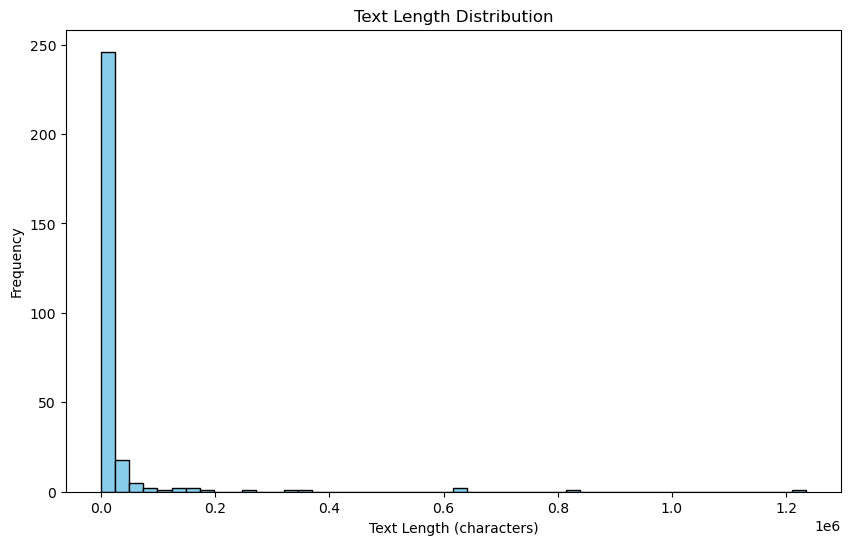

In [21]:
import matplotlib.pyplot as plt

# 计算每条文本的字符长度
data['text_length'] = data['text'].apply(len)

# 绘制文本长度的分布直方图
plt.figure(figsize=(10, 6))
plt.hist(data['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()


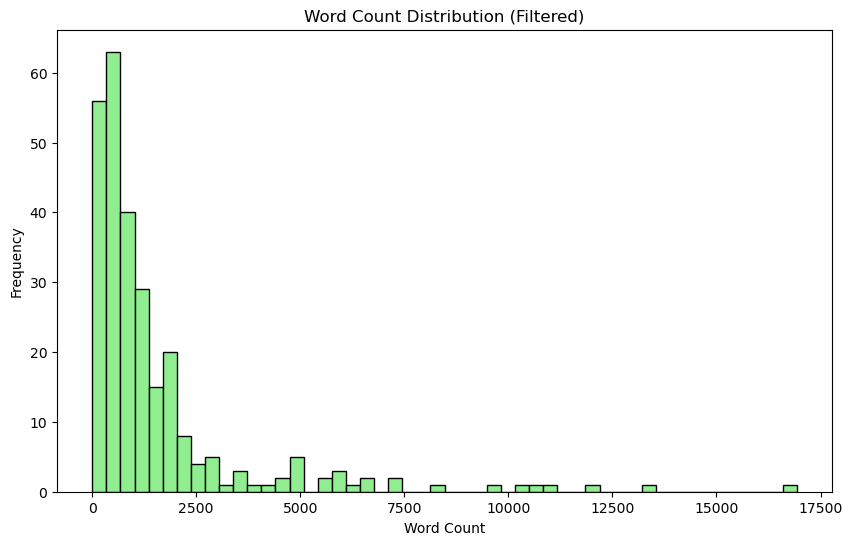

In [24]:
# 设置一个文本长度上限，过滤掉超长文本
filtered_data = data[data['word_count'] <= 20000]

# 绘制过滤后的词数分布直方图
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['word_count'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Word Count Distribution (Filtered)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


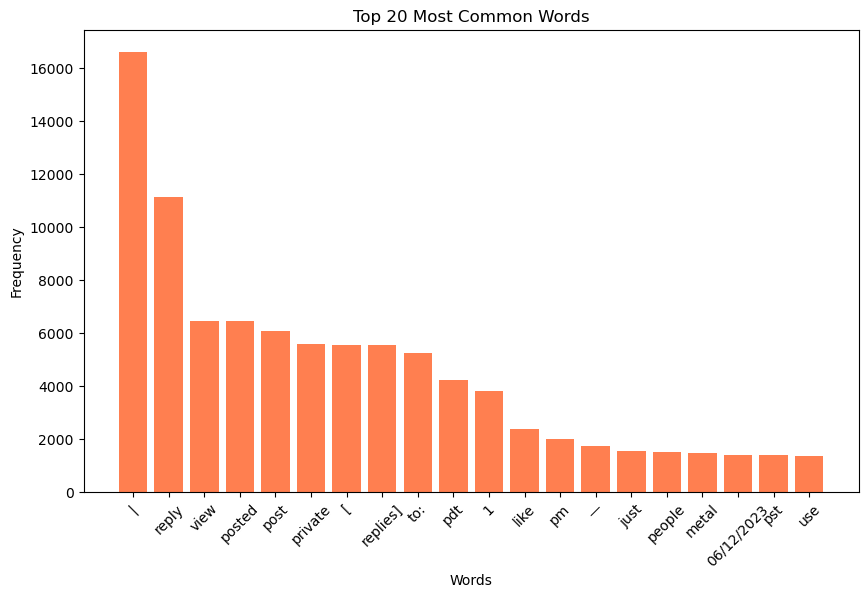

In [25]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# 将所有文本合并为一个字符串，并分词
all_words = ' '.join(data['text']).lower().split()
# 过滤掉停用词
filtered_words = [word for word in all_words if word not in ENGLISH_STOP_WORDS]

# 统计词频
word_freq = Counter(filtered_words)
common_words = word_freq.most_common(20)

# 绘制最常见词汇的条形图
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='coral')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## Analysis for term "freakshow"

In [27]:
# count "freakshow" occured frequency
freakshow_count = data['text'].str.count(r'\bfreakshow\b').sum()
print(f"'freakshow' appears {freakshow_count} times in the dataset.")


'freakshow' appears 449 times in the dataset.


In [31]:
pip install transformers torch


Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.model_selection import train_test_split


data = data.dropna(subset=['text', 'label'])  # 确保文本和标签都存在

# 划分训练集和测试集
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['text'].tolist(), data['label'].tolist(), test_size=0.2, random_state=42
)

KeyError: ['label']